In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# Latar Belakang

Airbnb telah menjadi salah satu platform utama dalam industri akomodasi, menawarkan alternatif bagi wisatawan yang mencari pengalaman tinggal yang lebih personal dan fleksibel dibandingkan hotel tradisional. Bangkok, sebagai salah satu tujuan wisata paling populer di Asia Tenggara, menarik jutaan pengunjung setiap tahun, menjadikannya pasar yang sangat menarik untuk penyewaan jangka pendek.

Data Airbnb di Bangkok mencakup berbagai aspek penting dari listing, seperti harga, jenis kamar, lokasi, jumlah ulasan, dan tingkat ketersediaan. Informasi ini tidak hanya mencerminkan preferensi pengunjung, tetapi juga memberikan wawasan tentang dinamika pasar akomodasi di kota yang kaya akan budaya dan atraksi wisata.

Dengan banyaknya pilihan akomodasi yang tersedia, pemahaman mendalam mengenai faktor-faktor yang mempengaruhi harga dan popularitas listing sangat penting bagi host, pengelola properti, dan pemangku kepentingan dalam industri pariwisata. Analisis data ini bertujuan untuk mengidentifikasi tren dan pola dalam harga sewa, jenis kamar yang paling diminati, serta hubungan antara lokasi dan ulasan yang diterima.

Melalui pemanfaatan data ini, diharapkan stakeholder dapat merumuskan strategi pemasaran yang lebih efektif, meningkatkan kualitas layanan, dan mengoptimalkan pengalaman tamu, sekaligus memberikan kontribusi positif terhadap industri pariwisata Bangkok secara keseluruhan.

# 1. Data Cleaning

In [2]:
df = pd.read_csv(r'C:\Users\putra\Desktop\Purwadhika\Capstone Project 2\Airbnb Listings Bangkok.csv')
# Menghapus kolom berdasarkan indeks
df = df.drop(df.columns[0], axis=1)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15854 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

In [4]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

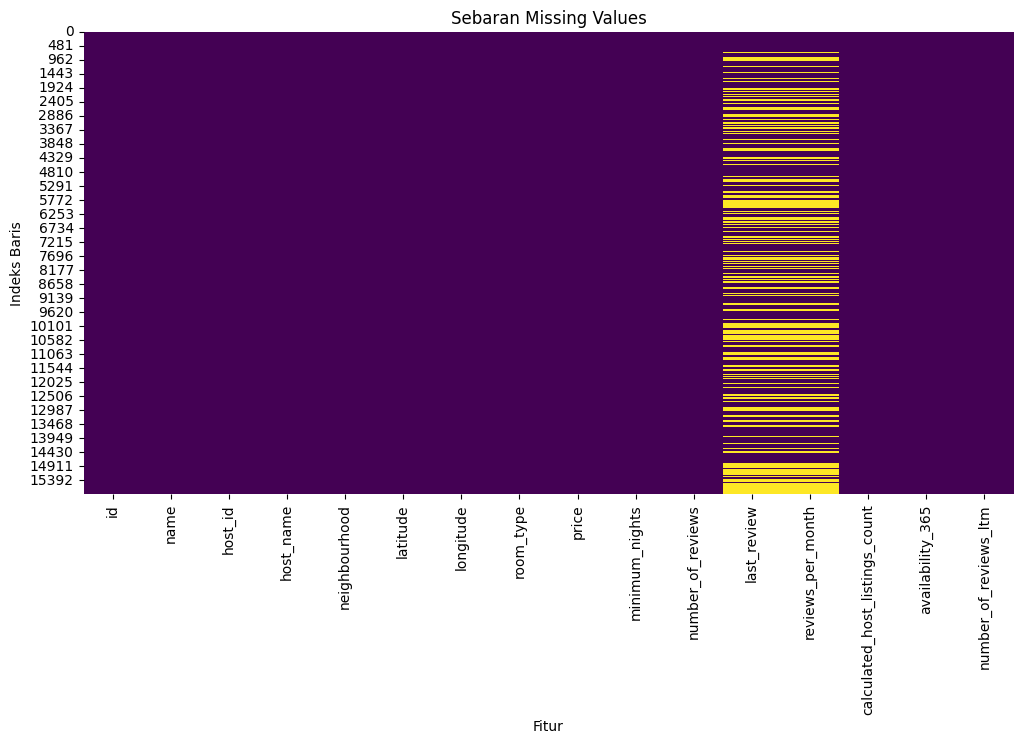

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Ukuran figure bisa disesuaikan
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # 'viridis' memberikan kontras yang baik
plt.title('Sebaran Missing Values')
plt.xlabel('Fitur')
plt.ylabel('Indeks Baris')
plt.show()


In [6]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15854 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

In [7]:
df['last_review'].fillna('Tidak ada ulasan', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15854 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     15854 non-null  object 
 12  reviews_per_month               

In [8]:
# Statistika Deskriptif
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.516178,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,0.952753,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15854,15854,15854,15854
unique,14794,5313,50,4,1670
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,Tidak ada ulasan
freq,45,228,2153,8912,5790


Berdasarkan hasil statistika deskriptif yang kita miliki, ada beberapa hal yang bisa dianggap aneh atau mencolok dalam data:

1. Harga yang Sangat Tinggi dan Harga 0:

Ada nilai maksimum price sebesar 1,100,000. Ini terlihat tidak wajar jika dibandingkan dengan rata-rata (sekitar 3,218) dan rentang harga yang lebih umum. Ini mungkin merupakan outlier atau kesalahan input data. Ditemukan juga sekitar 1403 kamar dengan harga diatas upper bound atau Q3 + 1.5 IQR atau diatas 4722. Terdapat pula satu kamar dengan harga 0 atau gratis.

2. Minimum Nights yang Ekstrem:

Kolom minimum_nights menunjukkan nilai maksimum sebesar 1,125. Ini sangat tinggi jika dibandingkan dengan nilai median (1) dan 75% quantile (7). Ini bisa jadi outlier atau mungkin ada kesalahan dalam pengisian data.

3. Jumlah Ulasan (Reviews):

Meskipun ada banyak listing, kolom number_of_reviews menunjukkan rata-rata sekitar 16.65 dengan nilai maksimum 1,224. Ini berarti banyak listing yang memiliki sedikit atau bahkan tidak ada ulasan. Hal ini dapat menunjukkan bahwa banyak listing mungkin baru atau tidak populer.

4. Kolom reviews_per_month:

Nilai rata-rata yang rendah (0.52) menunjukkan bahwa banyak listing memiliki sedikit aktivitas ulasan, dan terdapat banyak nilai nol. Ini sejalan dengan jumlah ulasan yang rendah.

5. Frekuensi Nilai Unik di name dan host_name:

Ada banyak nilai unik dalam kolom name (14,794) dan host_name (5,313), namun dengan banyak frekuensi rendah, artinya banyak listing yang mungkin baru atau kurang dikenal.

6. Nilai Hilang:

Kolom name memiliki 8 nilai hilang, yang bisa menjadi perhatian jika nama listing sangat penting untuk analisis.

In [9]:
# Menghitung batas bawah dan atas untuk outlier
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi dan menampilkan outlier harga
outlier_prices = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outlier_prices_10000 = df[(df['price'] < lower_bound) | (df['price'] > 10000)]

# Menampilkan Q1, Q3, dan IQR
print(f"Q1 (Kuartil Pertama): {Q1}")
print(f"Q3 (Kuartil Ketiga): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Batas Bawah: {lower_bound}")
print(f"Batas Atas: {upper_bound}")

# Menampilkan jumlah outlier harga
count_outliers = len(outlier_prices)
count_outliers_10000 = len(outlier_prices_10000)
print(f"\nJumlah outlier harga: {count_outliers}")
print(f"\nJumlah outlier harga: {count_outliers_10000}")

# Menampilkan semua outlier harga
print("\nOutlier harga:\n", outlier_prices_10000[['id', 'name', 'room_type', 'price']])


Q1 (Kuartil Pertama): 900.0
Q3 (Kuartil Ketiga): 2429.0
IQR (Interquartile Range): 1529.0
Batas Bawah: -1393.5
Batas Atas: 4722.5

Jumlah outlier harga: 1403

Jumlah outlier harga: 375

Outlier harga:
                        id                                               name  \
17                  66046                   24Flr- 1br Apt near JJ, MRT, BTS   
275               1547429  บ้านใกล้สุวรรณภูมิ ตรงข้ามแอร์พอร์ตลิ้งบ้านทับ...   
393               4450156                  Stylish Apartment in Bangkok, MRT   
420               4526250                Luxury Apt Heart of Bkk Sukh soi 10   
484               3480807    Benviar - Three Bedroom Suite(225 Sqm) @Chitlom   
...                   ...                                                ...   
15690  790714578921259876                                    Pool Villa 107B   
15693  790816217344482012                      Astounding view on river bank   
15721  785892679369172786                            Modern 2 Bedrooms Suite  

In [10]:
# Menghapus baris dengan harga di atas 10,000
df_cleaned = df[df['price'] <= 10000]

# Menampilkan jumlah baris sebelum dan sesudah penghapusan
print(f"Jumlah baris sebelum penghapusan: {len(df)}")
print(f"Jumlah baris setelah penghapusan: {len(df_cleaned)}")

df = df_cleaned

Jumlah baris sebelum penghapusan: 15854
Jumlah baris setelah penghapusan: 15479


Harga (Price):

Batas outlier untuk harga ditetapkan di 10,000. Ini berarti bahwa setiap listing dengan harga di atas 10,000 dianggap sebagai outlier. Nilai ini jauh melebihi harga rata-rata listing di Bangkok, yang umumnya berada di bawah angka ini. Listing dengan harga ini mungkin mencerminkan properti yang sangat eksklusif atau unik, sehingga tidak mencerminkan pasar umum. Oleh karena itu, diklasifikasikan harga di atas $10,000 sebagai outlier yang perlu ditangani dengan hati-hati dalam analisis.

In [11]:
# Menampilkan semua listing dengan harga 0
zero_price_listings = df[df['price'] == 0]

# Jika ada listing dengan harga 0, tampilkan dan hapus
if not zero_price_listings.empty:
    print("Listing dengan harga 0:")
    for index, row in zero_price_listings.iterrows():
        print(f"ID: {row['id']}, Nama: {row['name']}, Harga: {row['price']}")
    
    # Menghapus row dengan harga 0 dari DataFrame
    df = df[df['price'] != 0]
    print("\nRow dengan harga 0 telah dihapus.")
else:
    print("Tidak ada listing dengan harga 0.")

Listing dengan harga 0:
ID: 44563108, Nama: Somerset Maison Asoke Bangkok, Harga: 0

Row dengan harga 0 telah dihapus.


In [12]:
# Menghitung batas bawah dan atas untuk outlier minimum_nights
Q1_min_nights = df['minimum_nights'].quantile(0.25)
Q3_min_nights = df['minimum_nights'].quantile(0.75)
IQR_min_nights = Q3_min_nights - Q1_min_nights
lower_bound_min_nights = Q1_min_nights - 1.5 * IQR_min_nights
upper_bound_min_nights = Q3_min_nights + 1.5 * IQR_min_nights

# Mengidentifikasi dan menampilkan outlier minimum_nights
outlier_min_nights = df[(df['minimum_nights'] < lower_bound_min_nights) | (df['minimum_nights'] > upper_bound_min_nights)]
outlier_min_nights_365 = df[(df['minimum_nights'] < lower_bound_min_nights) | (df['minimum_nights'] > 365)]

# Menampilkan Q1, Q3, dan IQR untuk minimum_nights
print(f"Q1 (Kuartil Pertama) Minimum Nights: {Q1_min_nights}")
print(f"Q3 (Kuartil Ketiga) Minimum Nights: {Q3_min_nights}")
print(f"IQR (Interquartile Range) Minimum Nights: {IQR_min_nights}")
print(f"Batas Bawah Minimum Nights: {lower_bound_min_nights}")
print(f"Batas Atas Minimum Nights: {upper_bound_min_nights}")

# Menampilkan jumlah outlier minimum_nights
count_outlier_min_nights = len(outlier_min_nights)
count_outlier_min_nights_365 = len(outlier_min_nights_365)
print(f"\nJumlah outlier minimum nights: {count_outlier_min_nights}")
print(f"\nJumlah outlier minimum nights 365: {count_outlier_min_nights_365}")

# Menampilkan semua outlier minimum_nights
print("\nOutlier minimum nights:\n", outlier_min_nights[['id', 'name', 'room_type','minimum_nights']])
print("\nOutlier minimum nights 365 hari:\n", outlier_min_nights_365[['id', 'name', 'room_type','minimum_nights']])


Q1 (Kuartil Pertama) Minimum Nights: 1.0
Q3 (Kuartil Ketiga) Minimum Nights: 7.0
IQR (Interquartile Range) Minimum Nights: 6.0
Batas Bawah Minimum Nights: -8.0
Batas Atas Minimum Nights: 16.0

Jumlah outlier minimum nights: 3107

Jumlah outlier minimum nights 365: 11

Outlier minimum nights:
                        id                                           name  \
2                   28745              modern-style apartment in Bangkok   
5                 1704776                 NEw Pro!!  Bungalow Bkk Centre   
14                 959254             Deluxe Condo, Nana, Pool/GYM/Sauna   
16                1791481            Nice and Quiet condo near BTS Onnut   
18                 105042            Central Bangkok 3 Bedroom Apartment   
...                   ...                                            ...   
15805  789440470509021553                        supremesky pool@chitlom   
15833  790283533781929861                         iSanook Suite 34 sqm 8   
15839  790404714116491

In [13]:
# Menghapus baris dengan minimum_nights di atas 365
df_cleaned_min_nights = df[df['minimum_nights'] <= 365]

# Menampilkan jumlah baris sebelum dan sesudah penghapusan
print(f"Jumlah baris sebelum penghapusan: {len(df)}")
print(f"Jumlah baris setelah penghapusan: {len(df_cleaned_min_nights)}")
df = df_cleaned_min_nights

Jumlah baris sebelum penghapusan: 15478
Jumlah baris setelah penghapusan: 15467


Minimum Nights:

Batas outlier untuk minimum nights ditetapkan di 365 malam atau satu tahun. Ini menunjukkan bahwa setiap listing yang mengharuskan penyewaan selama satu tahun penuh dianggap sebagai outlier. Dalam konteks penyewaan jangka pendek, syarat minimum nights sebesar 365 tidak lazim, karena kebanyakan listing biasanya menawarkan fleksibilitas dengan minimum satu hingga beberapa malam. Oleh karena itu, diklasifikasikan minimum nights di atas 365 sebagai outlier.

In [14]:
#Analisis Deskriptif
print("Deskripsi jumlah ulasan:")
print(df['number_of_reviews'].describe())

#Mengidentifikasi dan menampilkan outlier jumlah ulasan
Q1_reviews = df['number_of_reviews'].quantile(0.25)
Q3_reviews = df['number_of_reviews'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews
lower_bound_reviews = Q1_reviews - 1.5 * IQR_reviews
upper_bound_reviews = Q3_reviews + 1.5 * IQR_reviews

outlier_reviews = df[(df['number_of_reviews'] < lower_bound_reviews) | (df['number_of_reviews'] > upper_bound_reviews)]

print(f"\nJumlah outlier jumlah ulasan: {len(outlier_reviews)}")
print("\nOutlier jumlah ulasan:\n", outlier_reviews[['id', 'name', 'number_of_reviews']])

#Mengisi nilai hilang dengan 0 (jika ada)
df['number_of_reviews'].fillna(0, inplace=True)

#Kategorisasi jumlah ulasan
bins = [0, 1, 5, 20, 100, float('inf')]
labels = ['0', '1-5', '6-20', '21-100', '100+']
df['review_category'] = pd.cut(df['number_of_reviews'], bins=bins, labels=labels, right=False)

#Menampilkan distribusi kategori
print("\nDistribusi kategori jumlah ulasan:")
print(df['review_category'].value_counts())


Deskripsi jumlah ulasan:
count    15467.000000
mean        16.795629
std         40.794666
min          0.000000
25%          0.000000
50%          2.000000
75%         14.000000
max       1224.000000
Name: number_of_reviews, dtype: float64

Jumlah outlier jumlah ulasan: 2025

Outlier jumlah ulasan:
                        id                                               name  \
0                   27934                    Nice room with superb city view   
11                1765918                     2BR apt in a cozy neighborhood   
12                  55686       Comfy bedroom near River pier & BTS  Taksin.   
16                1791481                Nice and Quiet condo near BTS Onnut   
18                 105042                Central Bangkok 3 Bedroom Apartment   
...                   ...                                                ...   
12897  619948426650208690  Large 4 Bedroom private pool villa ThonglorEkk...   
12955  634225126482473228          2 King  beds❤️Netflix, 

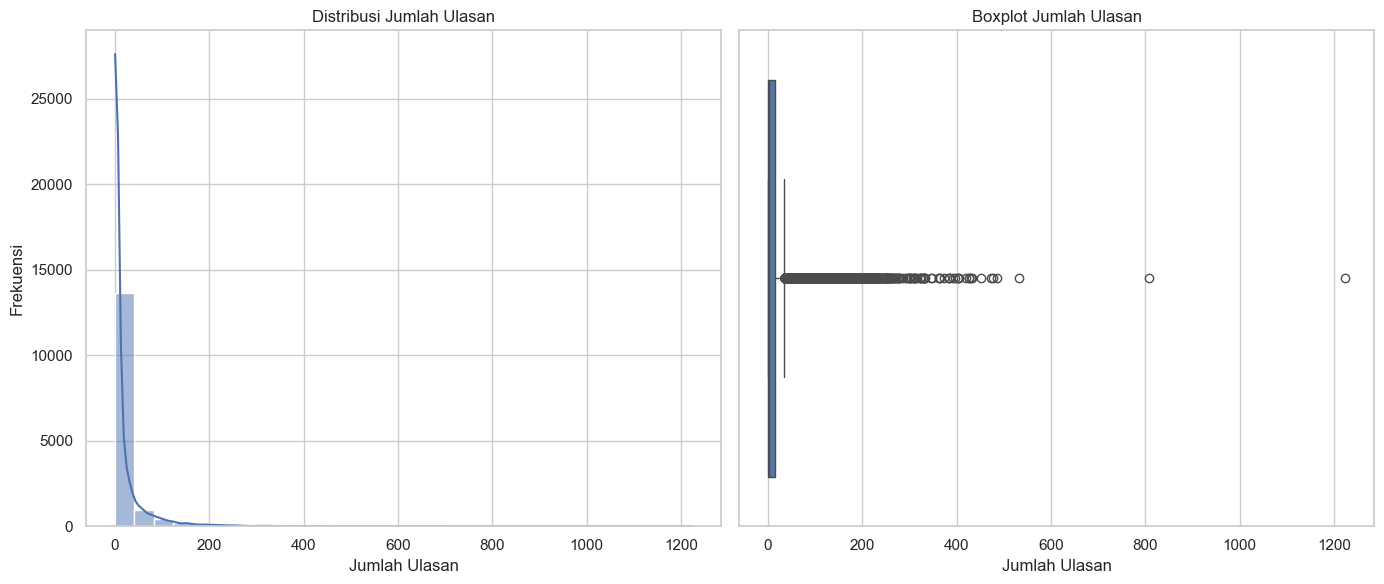

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style untuk visualisasi
sns.set(style="whitegrid")

# Membuat figure
plt.figure(figsize=(14, 6))

# Histogram jumlah ulasan
plt.subplot(1, 2, 1)
sns.histplot(df['number_of_reviews'], bins=30, kde=True)
plt.title('Distribusi Jumlah Ulasan')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Frekuensi')

# Boxplot jumlah ulasan
plt.subplot(1, 2, 2)
sns.boxplot(x=df['number_of_reviews'])
plt.title('Boxplot Jumlah Ulasan')
plt.xlabel('Jumlah Ulasan')

# Tampilkan grafik
plt.tight_layout()
plt.show()


In [16]:
# Cek jumlah nilai kosong di kolom name
print("Jumlah nilai kosong di kolom 'name':", df['name'].isnull().sum())

# 1. Mengisi dengan nilai default
df['name'].fillna('Tidak ada nama', inplace=True)
# Cek kembali untuk memastikan tidak ada nilai kosong
print("Jumlah nilai kosong di kolom 'name' setelah diisi:", df['name'].isnull().sum())

Jumlah nilai kosong di kolom 'name': 8
Jumlah nilai kosong di kolom 'name' setelah diisi: 0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15467 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              15467 non-null  int64   
 1   name                            15467 non-null  object  
 2   host_id                         15467 non-null  int64   
 3   host_name                       15467 non-null  object  
 4   neighbourhood                   15467 non-null  object  
 5   latitude                        15467 non-null  float64 
 6   longitude                       15467 non-null  float64 
 7   room_type                       15467 non-null  object  
 8   price                           15467 non-null  int64   
 9   minimum_nights                  15467 non-null  int64   
 10  number_of_reviews               15467 non-null  int64   
 11  last_review                     15467 non-null  object  
 12  reviews_per_month 

In [18]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.546700e+04,1.546700e+04,15467.000000,15467.000000,15467.000000,15467.000000,15467.000000,15467.000000,15467.000000,15467.000000,15467.000000
mean,1.587651e+17,1.536453e+08,13.745323,100.559884,1903.146829,14.363742,16.795629,0.522375,14.032133,243.965475,3.526023
std,2.951536e+17,1.317397e+08,0.043211,0.051068,1621.062856,43.502400,40.794666,0.959018,30.572446,125.726859,8.973185
min,2.793400e+04,5.892000e+04,13.527300,100.329550,278.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104504e+07,3.963062e+07,13.720070,100.529660,900.000000,1.000000,0.000000,0.000000,1.000000,137.000000,0.000000
50%,3.509716e+07,1.222968e+08,13.738690,100.561370,1400.000000,1.000000,2.000000,0.090000,4.000000,308.000000,0.000000
75%,5.271064e+07,2.381958e+08,13.759600,100.585180,2275.500000,7.000000,14.000000,0.690000,13.000000,360.000000,3.000000
max,7.907510e+17,4.926659e+08,13.953540,100.923440,10000.000000,365.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


# 2. Analisis Data

# A. Pendekatan Harga berdasarkan Tipe Kamar

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung statistik deskriptif untuk harga berdasarkan tipe kamar
price_stats = df.groupby('room_type')['price'].describe()
print(price_stats)

# Menghitung standar deviasi
std_dev = df.groupby('room_type')['price'].std()
print(f"\nStandar Deviasi Harga:\n{std_dev}")

                  count         mean          std    min     25%     50%  \
room_type                                                                  
Entire home/apt  8703.0  2047.953809  1608.332913  332.0  1000.0  1500.0   
Hotel room        635.0  2295.919685  1900.764568  318.0   990.0  1690.0   
Private room     5612.0  1743.130969  1598.562973  278.0   800.0  1200.0   
Shared room       517.0   720.058027   830.305436  280.0   390.0   500.0   

                    75%      max  
room_type                         
Entire home/apt  2500.0  10000.0  
Hotel room       3042.0   9999.0  
Private room     2000.0  10000.0  
Shared room       620.0   8000.0  

Standar Deviasi Harga:
room_type
Entire home/apt    1608.332913
Hotel room         1900.764568
Private room       1598.562973
Shared room         830.305436
Name: price, dtype: float64


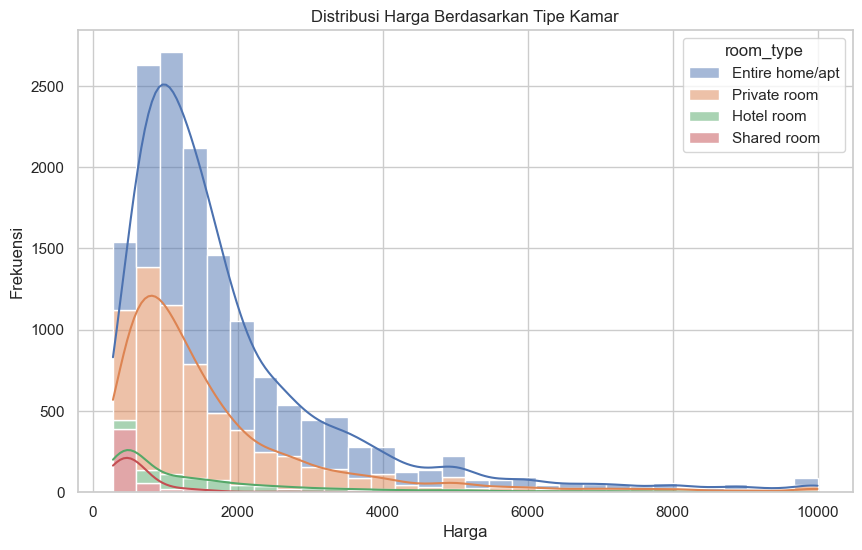

In [20]:
# Histogram untuk distribusi harga berdasarkan tipe kamar
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='room_type', multiple='stack', bins=30, kde=True)
plt.title('Distribusi Harga Berdasarkan Tipe Kamar')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

Uji Shapiro-Wilk: Statistik = 0.7506288290023804, p-value = 0.0


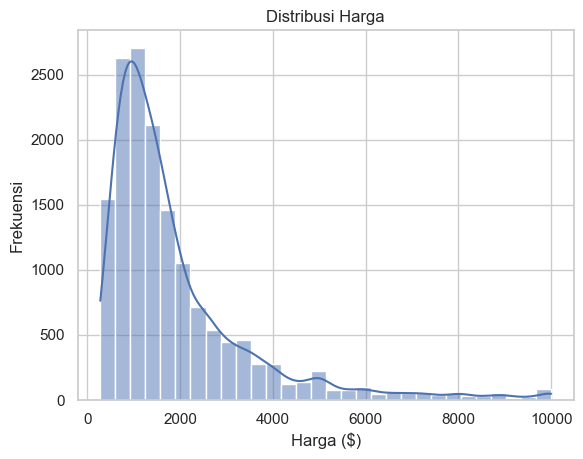

Uji Mann-Whitney: Statistik = 19700373.0, p-value = 3.6883169110607465e-85


In [21]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Uji normalitas untuk harga
stat, p_value = stats.shapiro(df['price'])
print(f'Uji Shapiro-Wilk: Statistik = {stat}, p-value = {p_value}')

# Visualisasi distribusi harga
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Harga ($)')
plt.ylabel('Frekuensi')
plt.show()

# Jika data tidak normal, lakukan uji non-parametrik
# Contoh: Uji Mann-Whitney antara dua jenis kamar
private_rooms = df[df['room_type'] == 'Private room']['price']
entire_homes = df[df['room_type'] == 'Entire home/apt']['price']

# Uji Mann-Whitney
stat, p_value = stats.mannwhitneyu(private_rooms, entire_homes)
print(f'Uji Mann-Whitney: Statistik = {stat}, p-value = {p_value}')


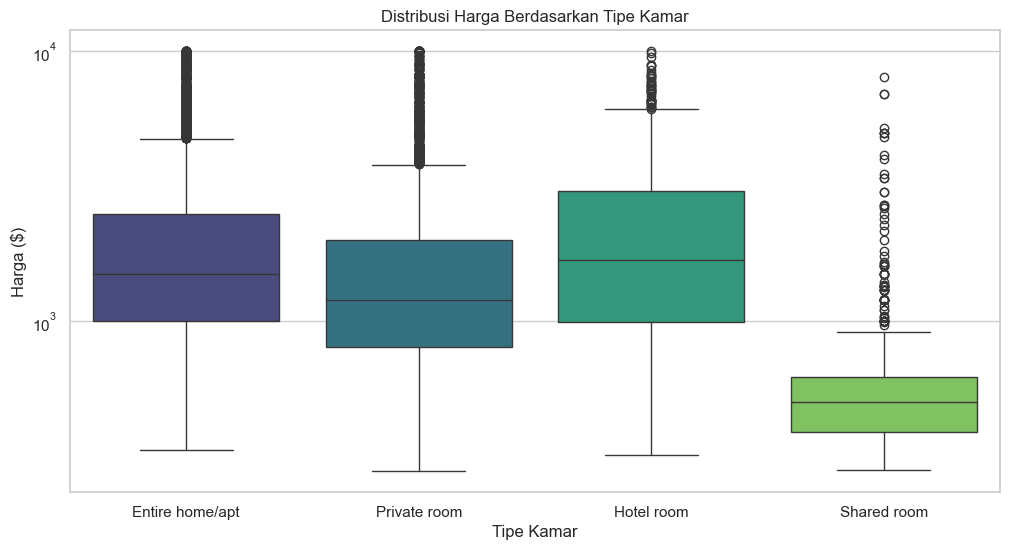

Kruskal-Wallis Statistic: 1257.892488794141, p-value: 2.0147599668349417e-272
Ada perbedaan signifikan antara harga tipe kamar.


In [22]:
# Visualisasi dengan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df, palette='viridis')
plt.title('Distribusi Harga Berdasarkan Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga ($)')
plt.yscale('log')  # Skala logaritmik untuk mengatasi outlier
plt.show()

# Mengambil harga untuk setiap tipe kamar
entire_home_prices = df[df['room_type'] == 'Entire home/apt']['price']
private_room_prices = df[df['room_type'] == 'Private room']['price']
shared_room_prices = df[df['room_type'] == 'Shared room']['price']
hotel_room_prices = df[df['room_type'] == 'Hotel room']['price']

# Melakukan uji Kruskal-Wallis
kruskal_stat, kruskal_p = stats.kruskal(
    entire_home_prices,
    private_room_prices,
    shared_room_prices,
    hotel_room_prices
)

print(f'Kruskal-Wallis Statistic: {kruskal_stat}, p-value: {kruskal_p}')

# Interpretasi hasil
if kruskal_p < 0.05:
    print("Ada perbedaan signifikan antara harga tipe kamar.")
else:
    print("Tidak ada perbedaan signifikan antara harga tipe kamar.")

Hasil dari analisis menunjukkan adanya perbedaan signifikan dalam harga berdasarkan jenis kamar yang ditawarkan. 

-Uji Shapiro-Wilk menghasilkan statistik 0.75 dengan p-value 0.0, yang menunjukkan bahwa distribusi harga tidak mengikuti distribusi normal. Ini berarti kita tidak dapat menggunakan uji parametrik untuk membandingkan harga antar jenis kamar. Sebagai alternatif, uji Mann-Whitney dan Kruskal-Wallis digunakan. 

-Uji Mann-Whitney menghasilkan statistik 19700373.0 dengan p-value yang sangat kecil (3.69e-85), menandakan bahwa terdapat perbedaan signifikan antara setidaknya dua jenis kamar dalam hal harga. 

-Uji Kruskal-Wallis memberikan statistik 1257.89 dengan p-value 2.01e-272, yang juga menunjukkan perbedaan signifikan dalam harga antara tiga atau lebih kelompok jenis kamar. Secara keseluruhan, hasil ini mengindikasikan bahwa harga kamar bervariasi secara signifikan tergantung pada tipe kamar, sehingga stakeholder perlu mempertimbangkan jenis kamar yang ditawarkan dalam strategi penetapan harga untuk menarik lebih banyak pelanggan.

## B. Distribusi Harga Berdasarkan Host

Rata-rata Harga per Host:
    host_id    price
0    58920  1509.50
1    70413  1213.00
2   108793   942.75
3   120437  1905.00
4   120541  1408.00


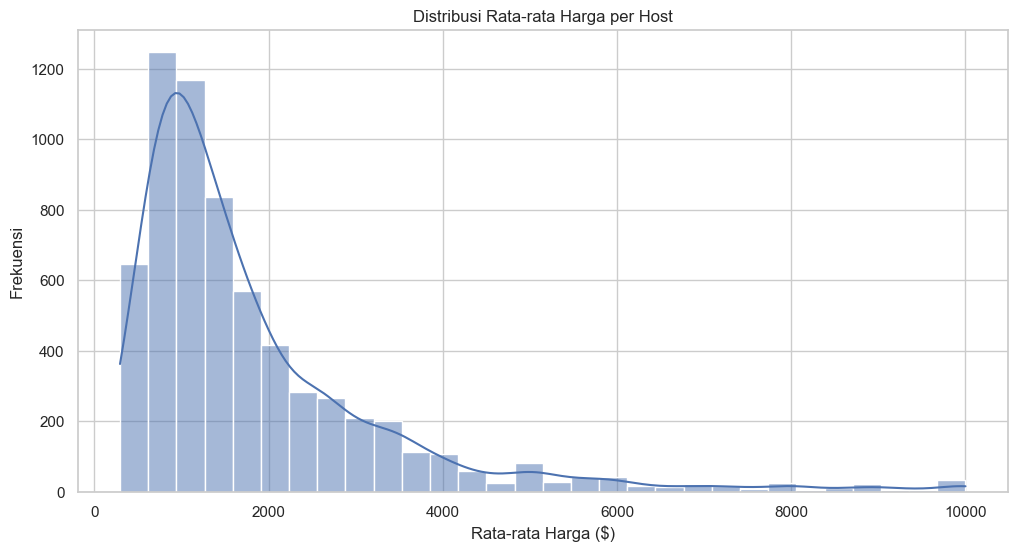

In [23]:
# Menghitung Rata-rata Harga per Host
average_price_per_host = df.groupby('host_id')['price'].mean().reset_index()

# Tampilkan Rata-rata Harga per Host
print("Rata-rata Harga per Host:\n", average_price_per_host.head())

# Visualisasikan Rata-rata Harga per Host dengan Histogram
plt.figure(figsize=(12, 6))
sns.histplot(average_price_per_host['price'], bins=30, kde=True)  # KDE untuk menampilkan estimasi kepadatan
plt.title('Distribusi Rata-rata Harga per Host')
plt.xlabel('Rata-rata Harga ($)')
plt.ylabel('Frekuensi')
plt.show()

In [24]:
# Hitung Statistik Tambahan per Host
host_stats = df.groupby('host_id').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    num_listings=('id', 'count'),
).reset_index()

# Tampilkan Statistik Tambahan
print("Statistik Tambahan per Host:\n", host_stats)

# Menghitung rata-rata harga dari semua listing
mean_price_overall = df['price'].mean()

# Menghitung jumlah host dengan harga di atas rata-rata
hosts_above_mean = df[df['price'] > mean_price_overall]['host_id'].nunique()

# Menghitung jumlah host dengan harga di bawah rata-rata
hosts_below_mean = df[df['price'] < mean_price_overall]['host_id'].nunique()

# Menampilkan hasil
print(f"Rata-rata Harga: ${mean_price_overall:.2f}")
print(f"Jumlah Host dengan Harga di Atas Rata-rata: {hosts_above_mean}")
print(f"Jumlah Host dengan Harga di Bawah Rata-rata: {hosts_below_mean}")

Statistik Tambahan per Host:
         host_id  average_price  median_price  num_listings
0         58920        1509.50        1509.5             2
1         70413        1213.00        1189.0             3
2        108793         942.75         960.5             4
3        120437        1905.00        1905.0             2
4        120541        1408.00        1408.0             2
...         ...            ...           ...           ...
6514  492361460         960.00         960.0             1
6515  492463555        1385.00        1385.0             1
6516  492465329         972.00         972.0             1
6517  492470428        5664.00        5664.0             1
6518  492665929        1444.00        1444.0             1

[6519 rows x 4 columns]
Rata-rata Harga: $1903.15
Jumlah Host dengan Harga di Atas Rata-rata: 2366
Jumlah Host dengan Harga di Bawah Rata-rata: 4731


Dari analisis statistik tambahan per host, kita dapat menarik beberapa kesimpulan penting mengenai harga dan jumlah listing di platform Airbnb:

- Rata-rata Harga Tinggi: Rata-rata harga per listing adalah $1903.15, yang menunjukkan bahwa banyak listing memiliki harga yang cukup tinggi. Ini dapat mengindikasikan permintaan yang kuat untuk akomodasi premium di Bangkok.

- Distribusi Host: Dari total 6519 host, terdapat 2366 host yang menawarkan harga di atas rata-rata, sementara 4731 host menawarkan harga di bawah rata-rata. Ini menunjukkan bahwa mayoritas host cenderung menawarkan akomodasi dengan harga yang lebih terjangkau, sementara hanya sebagian kecil yang menawarkan listing premium.

- Strategi Penetapan Harga: Host yang menawarkan harga di atas rata-rata dapat memanfaatkan posisi mereka di pasar untuk meningkatkan keuntungan, tetapi mereka juga harus mempertimbangkan nilai yang mereka tawarkan kepada tamu, seperti fasilitas, lokasi, dan pengalaman yang unik. Di sisi lain, host dengan harga di bawah rata-rata mungkin memiliki kesempatan untuk menarik lebih banyak pelanggan, terutama bagi wisatawan dengan anggaran terbatas.

- Kesempatan untuk Meningkatkan Pendapatan: Host yang memiliki harga di atas rata-rata mungkin dapat meningkatkan jumlah listing mereka atau menawarkan paket promosi untuk menarik lebih banyak tamu. Sementara itu, host dengan harga di bawah rata-rata perlu memastikan bahwa kualitas akomodasi mereka tetap menarik untuk menjaga kepuasan pelanggan.

Secara keseluruhan, data ini memberikan wawasan penting bagi stakeholder untuk merumuskan strategi pemasaran dan penetapan harga yang lebih efektif dalam menarik tamu dan meningkatkan pendapatan dari listing mereka.

## C. Harga Berdasarkan distrik/neighbourhood

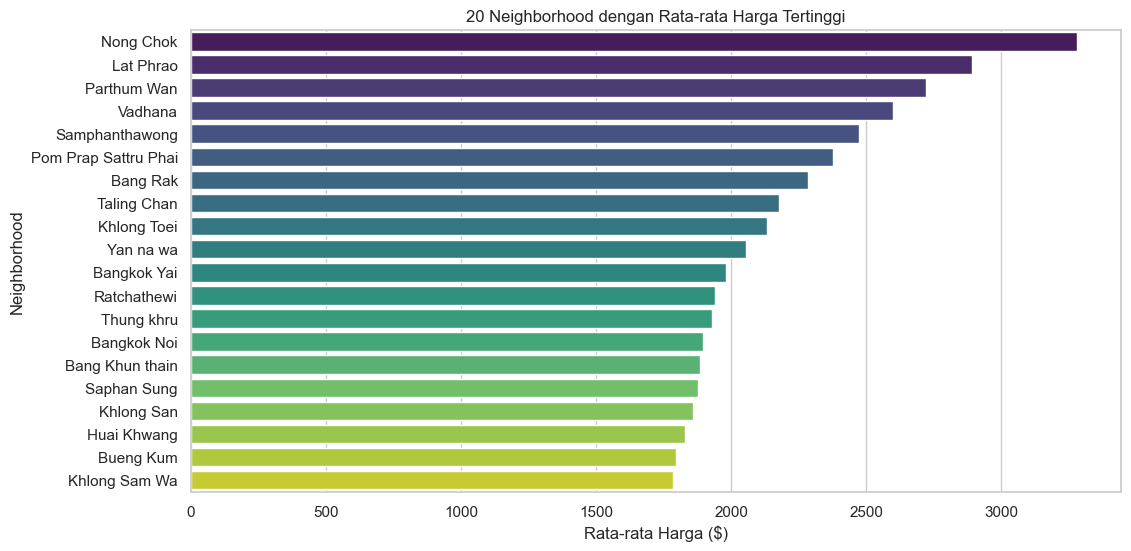

In [25]:
# Menghitung rata-rata harga berdasarkan neighbourhood
average_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean().reset_index()

# Mengurutkan berdasarkan harga dan mengambil 20 tertinggi
top_20_neighbourhood = average_price_by_neighbourhood.sort_values(by='price', ascending=False).head(20)

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='neighbourhood', data=top_20_neighbourhood, palette='viridis')
plt.title('20 Neighborhood dengan Rata-rata Harga Tertinggi')
plt.xlabel('Rata-rata Harga ($)')
plt.ylabel('Neighborhood')
plt.show()

Statistik Deskriptif Harga Berdasarkan Tipe Kamar:
                   count         mean          std    min     25%     50%  \
room_type                                                                  
Entire home/apt  8703.0  2047.953809  1608.332913  332.0  1000.0  1500.0   
Hotel room        635.0  2295.919685  1900.764568  318.0   990.0  1690.0   
Private room     5612.0  1743.130969  1598.562973  278.0   800.0  1200.0   
Shared room       517.0   720.058027   830.305436  280.0   390.0   500.0   

                    75%      max  
room_type                         
Entire home/apt  2500.0  10000.0  
Hotel room       3042.0   9999.0  
Private room     2000.0  10000.0  
Shared room       620.0   8000.0  

Kruskal-Wallis Test: Statistik = 1257.892488794141, p-value = 2.0147599668349417e-272


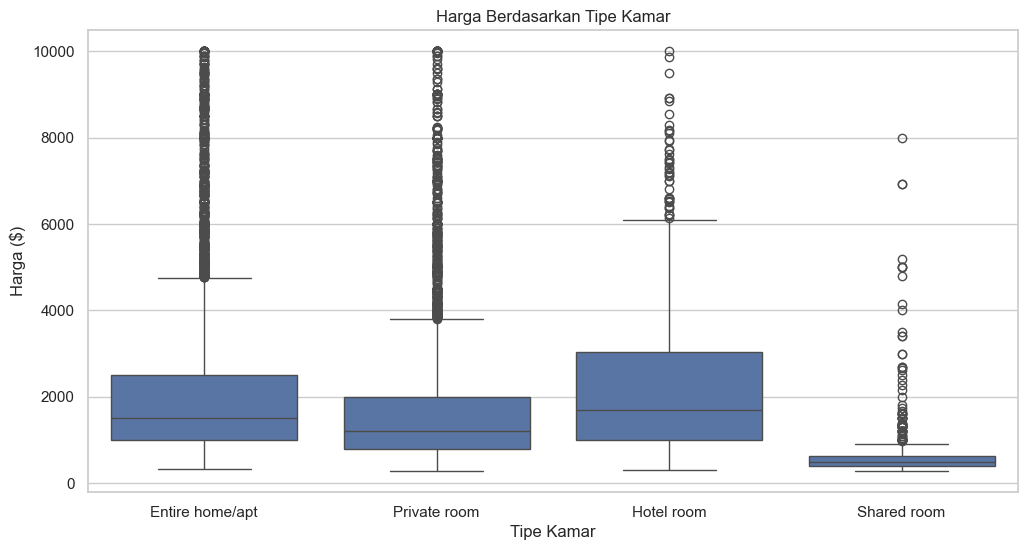

In [30]:
from scipy.stats import kruskal

#Menghitung Jarak ke Pusat Kota
city_center = (13.7563, 100.5018)  # Latitude, Longitude

def calculate_distance(row):
    lat1, lon1 = row['latitude'], row['longitude']
    lat2, lon2 = city_center
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2) * 111  # 111 km per derajat

df['distance_to_city_center'] = df.apply(calculate_distance, axis=1)

#Statistika Deskriptif Harga Berdasarkan Tipe Kamar
price_by_room_type = df.groupby('room_type')['price'].describe()
print("Statistik Deskriptif Harga Berdasarkan Tipe Kamar:\n", price_by_room_type)

#Uji Kruskal-Wallis untuk Tipe Kamar
room_types = df['room_type'].unique()
price_data = [df[df['room_type'] == room]['price'] for room in room_types]

kruskal_stat, p_value = kruskal(*price_data)
print(f"\nKruskal-Wallis Test: Statistik = {kruskal_stat}, p-value = {p_value}")

#Visualisasi Harga Berdasarkan Tipe Kamar
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Harga Berdasarkan Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga ($)')
plt.show()


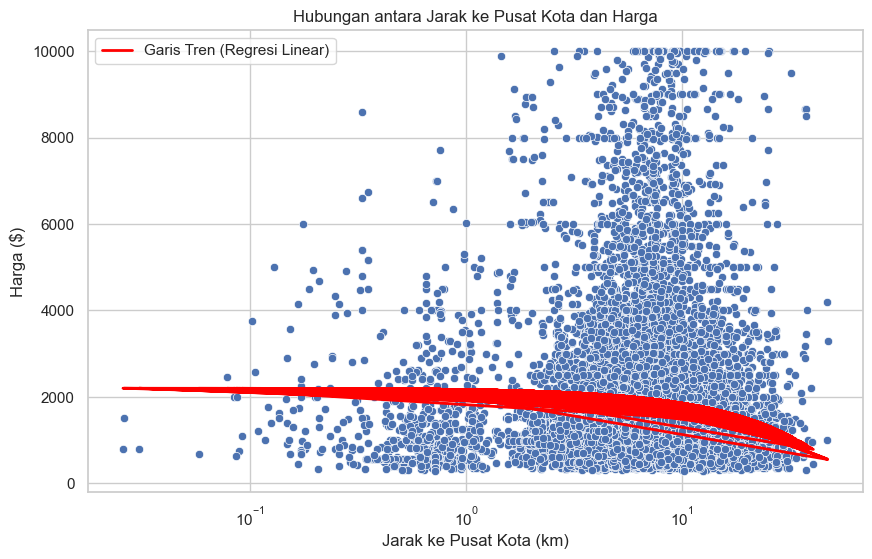

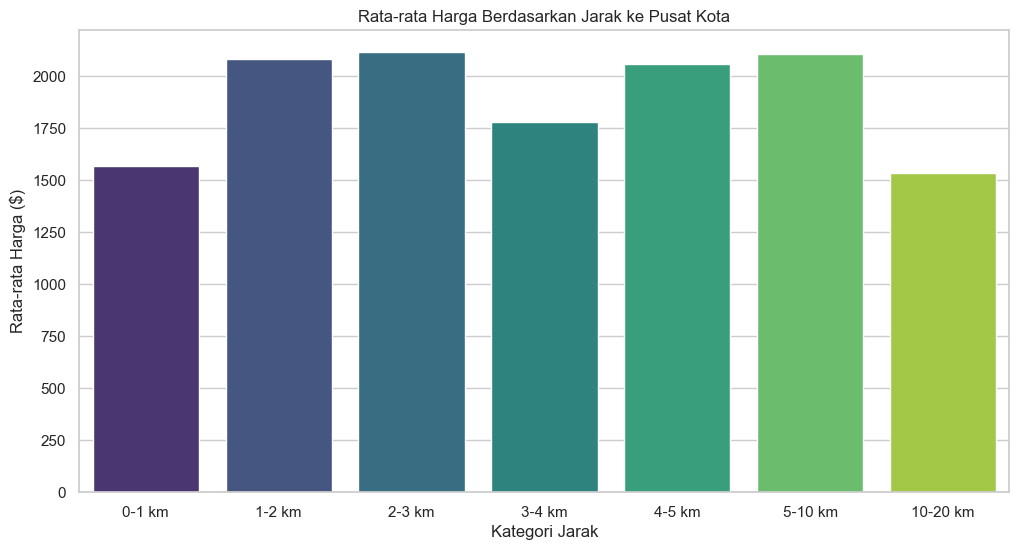

In [26]:
from sklearn.linear_model import LinearRegression

# Menghitung jarak ke pusat kota (dalam kilometer)
city_center = (13.7563, 100.5018)  # Latitude, Longitude

def calculate_distance(row):
    lat1, lon1 = row['latitude'], row['longitude']
    lat2, lon2 = city_center
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2) * 111  # 111 km per derajat

df['distance_to_city_center'] = df.apply(calculate_distance, axis=1)

# Visualisasi dengan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_city_center', y='price', data=df)
plt.title('Hubungan antara Jarak ke Pusat Kota dan Harga')
plt.xlabel('Jarak ke Pusat Kota (km)')
plt.ylabel('Harga ($)')
plt.xscale('log')  # Skala logaritmik untuk jarak

# Regresi linear
X = df[['distance_to_city_center']]
y = df['price']
model = LinearRegression()
model.fit(X, y)

# Memprediksi harga menggunakan model regresi
predicted_prices = model.predict(X)

# Menambahkan garis regresi ke plot
plt.plot(df['distance_to_city_center'], predicted_prices, color='red', linewidth=2, label='Garis Tren (Regresi Linear)')
plt.legend()

plt.show()

# Menghitung rata-rata harga berdasarkan kategori jarak
distance_bins = [0, 1, 2, 3, 4, 5, 10, 20]
distance_labels = ['0-1 km', '1-2 km', '2-3 km', '3-4 km', '4-5 km', '5-10 km', '10-20 km']
df['distance_category'] = pd.cut(df['distance_to_city_center'], bins=distance_bins, labels=distance_labels)

average_price_distance = df.groupby('distance_category')['price'].mean().reset_index()

# Bar plot untuk rata-rata harga berdasarkan kategori jarak
plt.figure(figsize=(12, 6))
sns.barplot(x='distance_category', y='price', data=average_price_distance, palette='viridis')
plt.title('Rata-rata Harga Berdasarkan Jarak ke Pusat Kota')
plt.xlabel('Kategori Jarak')
plt.ylabel('Rata-rata Harga ($)')
plt.show()


Statistik Deskriptif Harga Berdasarkan Jarak ke Pusat Kota:
                           count         mean          std     min      25%  \
distance_to_city_center                                                      
(-0.0213, 4.742]         3284.0  1912.036541  1555.697755   280.0   900.00   
(4.742, 9.459]           7292.0  2118.857515  1706.642867   304.0  1050.00   
(9.459, 14.175]          2945.0  1671.226146  1495.587909   278.0   800.00   
(14.175, 18.891]         1275.0  1420.135686  1413.569860   305.0   700.00   
(18.891, 23.608]          402.0  1317.843284  1164.886994   335.0   650.00   
(23.608, 28.324]          182.0  1681.120879  1730.079993   350.0   750.00   
(28.324, 33.04]            61.0  1131.131148  1278.664518   346.0   560.00   
(33.04, 37.757]            19.0  2940.736842  2740.045495   310.0   985.00   
(37.757, 42.473]            4.0  1151.250000   742.297952   450.0   828.75   
(42.473, 47.189]            3.0  2828.666667  1648.291641  1000.0  2143.00   

 

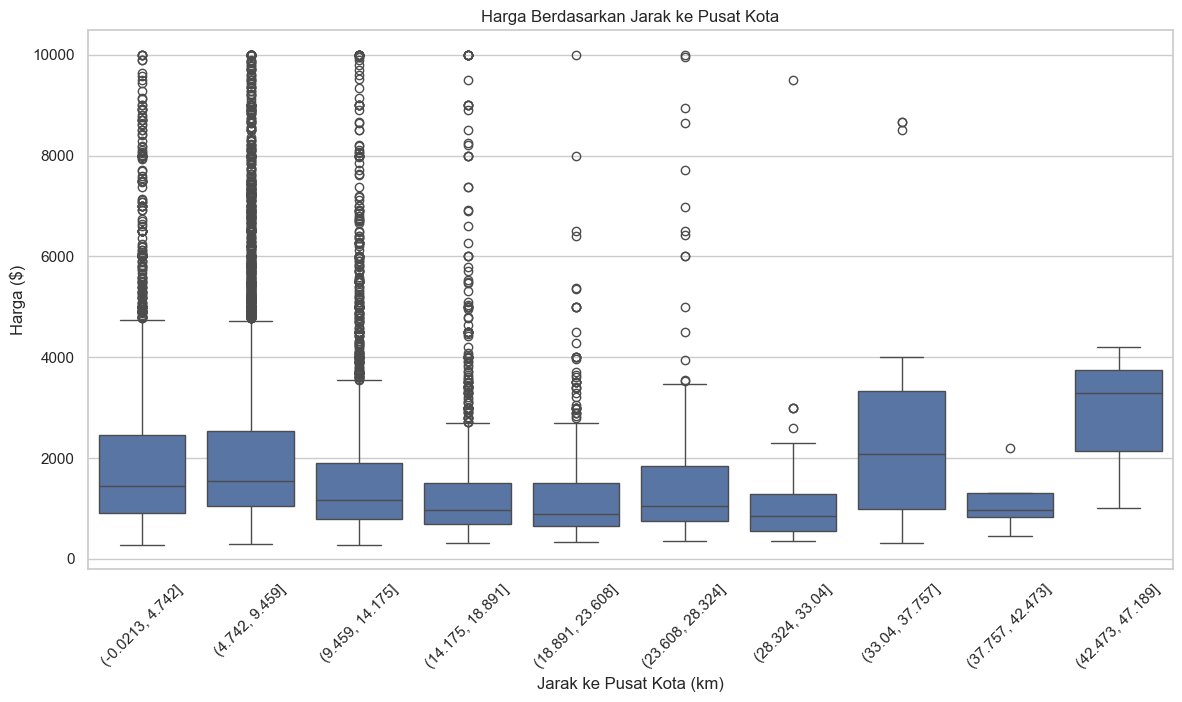

In [31]:

#Statistika Deskriptif Harga Berdasarkan Jarak ke Pusat Kota
price_by_distance = df.groupby(pd.cut(df['distance_to_city_center'], bins=10))['price'].describe()
print("\nStatistik Deskriptif Harga Berdasarkan Jarak ke Pusat Kota:\n", price_by_distance)

# Uji Kruskal-Wallis untuk Jarak ke Pusat Kota
distance_bins = pd.cut(df['distance_to_city_center'], bins=10)
price_data_distance = [df[distance_bins == distance_bin]['price'] for distance_bin in distance_bins.unique()]

kruskal_stat_distance, p_value_distance = kruskal(*price_data_distance)
print(f"\nKruskal-Wallis Test untuk Jarak ke Pusat Kota: Statistik = {kruskal_stat_distance}, p-value = {p_value_distance}")

#Visualisasi Harga Berdasarkan Jarak ke Pusat Kota
plt.figure(figsize=(14, 7))
sns.boxplot(x=distance_bins, y='price', data=df)
plt.title('Harga Berdasarkan Jarak ke Pusat Kota')
plt.xlabel('Jarak ke Pusat Kota (km)')
plt.ylabel('Harga ($)')
plt.xticks(rotation=45)
plt.show()

Berdasarkan analisis statistik harga akomodasi Airbnb di Bangkok, terdapat pola menarik terkait hubungan antara jarak dari pusat kota dan harga sewa. Meskipun umumnya diasumsikan bahwa akomodasi yang lebih dekat dengan pusat kota memiliki harga yang lebih tinggi, data menunjukkan sebaliknya. Kelompok akomodasi yang terletak jauh dari pusat kota (dalam rentang 42.473 hingga 47.189 km) memiliki rata-rata harga tertinggi, mencapai $3286.00.

Hal ini dapat diartikan bahwa area yang lebih jauh mungkin menawarkan fitur atau pengalaman yang lebih premium, seperti pemandangan yang indah atau fasilitas eksklusif, yang menarik minat wisatawan. Selain itu, permintaan dan penawaran di lokasi-lokasi tersebut juga dapat berkontribusi terhadap harga yang lebih tinggi, mungkin karena adanya keterbatasan jumlah akomodasi berkualitas di daerah tersebut.

Hasil uji Kruskal-Wallis yang signifikan menunjukkan bahwa perbedaan harga berdasarkan jarak dari pusat kota adalah nyata, menandakan bahwa para host di berbagai lokasi memanfaatkan kondisi unik untuk menarik tamu. Ini menyoroti kompleksitas pasar akomodasi di Bangkok, di mana jarak bukanlah satu-satunya faktor yang memengaruhi harga.

## D. Pengaruh Ulasan terhadap Harga, serta Ulasan dengan jarak ke Pusat Kota

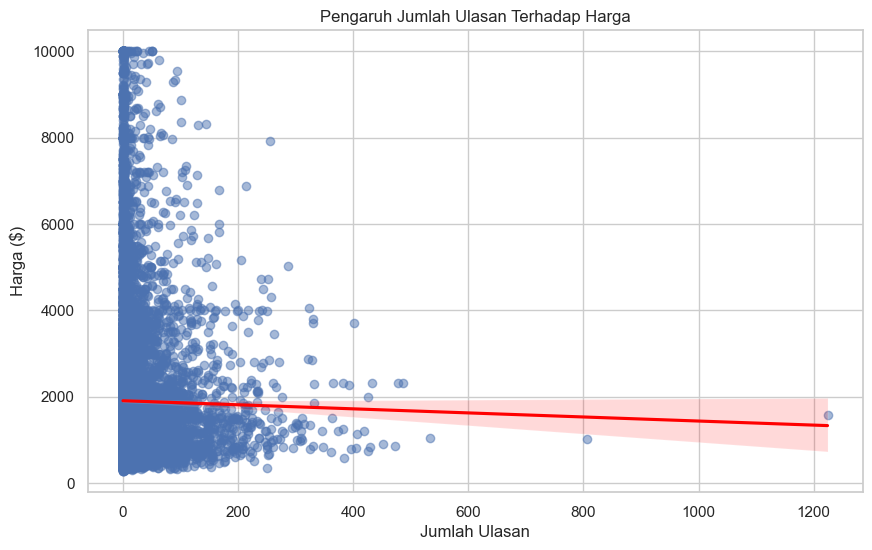

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Membuat scatter plot dengan garis regresi
plt.figure(figsize=(10, 6))
sns.regplot(x='number_of_reviews', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Pengaruh Jumlah Ulasan Terhadap Harga')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Harga ($)')
#plt.xscale('log')  # Jika diperlukan, skala logaritmik untuk jumlah ulasan
plt.show()


Korelasi antara jumlah ulasan dan rata-rata harga: 0.2643669847720359


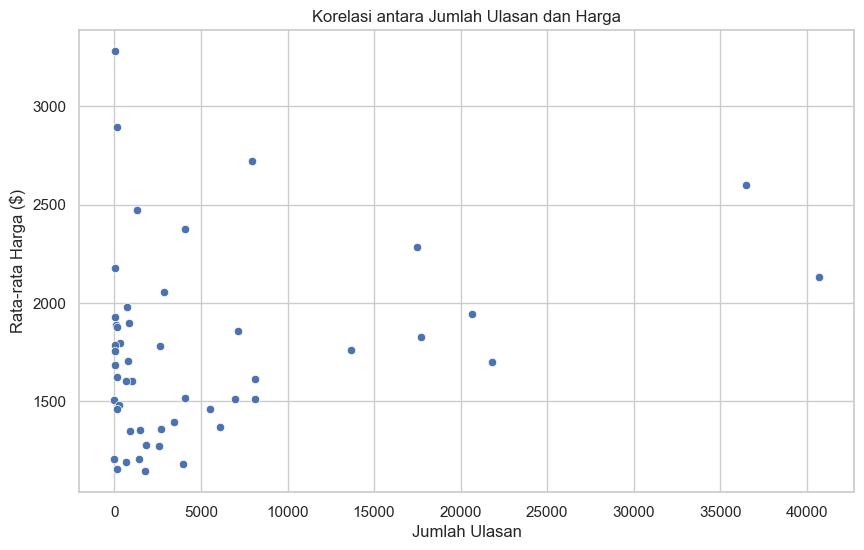

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung rata-rata harga per neighbourhood
average_price_per_neighbourhood = df.groupby('neighbourhood')['price'].mean().reset_index()

# Menghitung total ulasan per neighbourhood
total_reviews_per_neighbourhood = df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()

# Menggabungkan data rata-rata harga dan jumlah ulasan
combined_data = pd.merge(average_price_per_neighbourhood, total_reviews_per_neighbourhood, on='neighbourhood')

# Menghitung korelasi
correlation = combined_data['price'].corr(combined_data['number_of_reviews'])
print(f"Korelasi antara jumlah ulasan dan rata-rata harga: {correlation}")

# Visualisasi dengan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=combined_data)
plt.title('Korelasi antara Jumlah Ulasan dan Harga')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Rata-rata Harga ($)')
#plt.xscale('log')  # Skala logaritmik untuk jumlah ulasan jika diperlukan
plt.show()


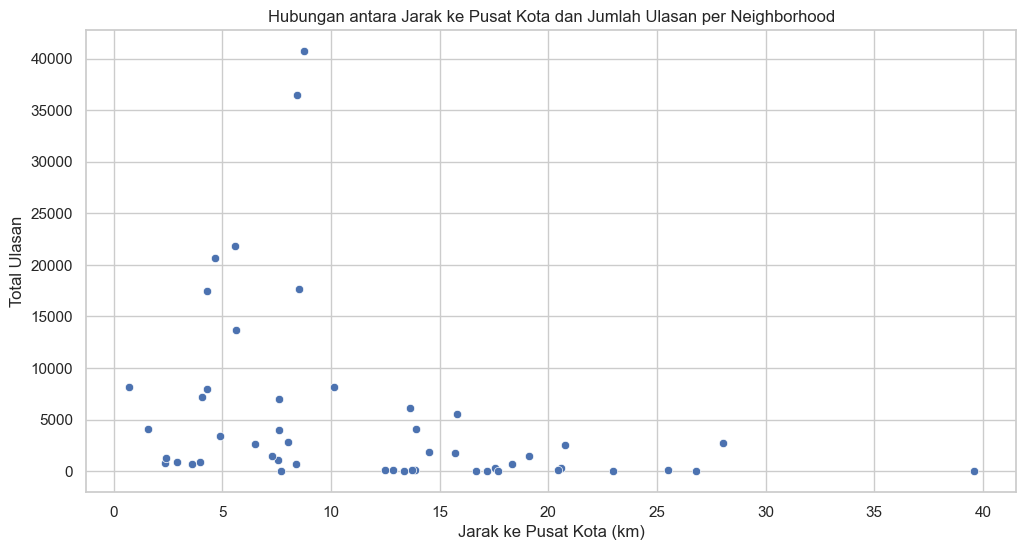

Korelasi antara Jarak ke Pusat Kota dan Total Ulasan: -0.31685735111292745


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Koordinat pusat kota Bangkok
city_center = (13.7563, 100.5018)

# Fungsi untuk menghitung jarak
def calculate_distance(row):
    lat1, lon1 = row['latitude'], row['longitude']
    lat2, lon2 = city_center
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2) * 111  # 111 km per derajat

# Tambahkan kolom jarak ke DataFrame
df['distance_to_city_center'] = df.apply(calculate_distance, axis=1)

# Hitung total ulasan dan jarak rata-rata per neighborhood
neighbourhood_analysis = df.groupby('neighbourhood').agg(
    total_reviews=('number_of_reviews', 'sum'),
    average_distance=('distance_to_city_center', 'mean')
).reset_index()

# Visualisasi hubungan antara total ulasan dan jarak rata-rata
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_distance', y='total_reviews', data=neighbourhood_analysis)
plt.title('Hubungan antara Jarak ke Pusat Kota dan Jumlah Ulasan per Neighborhood')
plt.xlabel('Jarak ke Pusat Kota (km)')
plt.ylabel('Total Ulasan')
#plt.xscale('log')  # Skala logaritmik untuk jarak jika perlu
plt.show()

# Hitung korelasi
correlation = neighbourhood_analysis['average_distance'].corr(neighbourhood_analysis['total_reviews'])
print(f"Korelasi antara Jarak ke Pusat Kota dan Total Ulasan: {correlation}")


In [32]:
import pandas as pd
import numpy as np

# Hitung rata-rata harga berdasarkan neighborhood
avg_price_per_neighbourhood = df.groupby('neighbourhood')['price'].mean().reset_index()

# Urutkan berdasarkan harga tertinggi
top_20_neighbourhoods = avg_price_per_neighbourhood.nlargest(20, 'price')

# Koordinat pusat kota Bangkok
city_center = (13.7563, 100.5018)

# Fungsi untuk menghitung jarak
def calculate_distance(row):
    lat1, lon1 = row['latitude'], row['longitude']
    lat2, lon2 = city_center
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2) * 111  # 111 km per derajat

# Tambahkan kolom jarak ke DataFrame
df['distance_to_city_center'] = df.apply(calculate_distance, axis=1)

# Hitung jarak rata-rata untuk 20 neighborhood teratas
top_20_neighbourhoods['distance'] = df[df['neighbourhood'].isin(top_20_neighbourhoods['neighbourhood'])].groupby('neighbourhood')['distance_to_city_center'].mean().values

# Tampilkan hasil
print(top_20_neighbourhoods.sort_values('distance'))


           neighbourhood        price   distance
46            Thung khru  1930.565217   1.564206
5        Bang Khun thain  1885.736842   2.406103
29           Parthum Wan  2723.323256   2.904493
47               Vadhana  2598.652992   3.582350
43           Taling Chan  2176.979592   4.059694
37           Ratchathewi  1941.537557   4.293765
25             Lat Phrao  2893.754717   4.297550
10           Bangkok Noi  1896.466216   4.678296
21            Khlong San  1858.888571   7.686907
20         Khlong Sam Wa  1783.933333   8.037544
12             Bueng Kum  1795.566038   8.440068
34  Pom Prap Sattru Phai  2376.190083   8.533364
22           Khlong Toei  2131.383784   8.749758
18           Huai Khwang  1828.050955  13.357757
49             Yan na wa  2056.205263  13.730952
27             Nong Chok  3279.928571  13.854351
39        Samphanthawong  2473.607143  17.559868
40           Saphan Sung  1878.674419  20.437304
8               Bang Rak  2285.475062  26.800299
11           Bangkok

20 Neighborhood dengan Jumlah Ulasan Terbanyak:
            neighbourhood  number_of_reviews
22           Khlong Toei              40711
47               Vadhana              36494
41                Sathon              21832
37           Ratchathewi              20658
18           Huai Khwang              17687
8               Bang Rak              17498
31            Phaya Thai              13659
33           Phra Nakhon               8128
13            Chatu Chak               8124
29           Parthum Wan               7924
21            Khlong San               7151
15             Din Daeng               6988
32          Phra Khanong               6115
6                Bang Na               5540
34  Pom Prap Sattru Phai               4062
42             Suanluang               4050
9               Bang Sue               3968
45             Thon buri               3454
49             Yan na wa               2856
24           Lat Krabang               2689


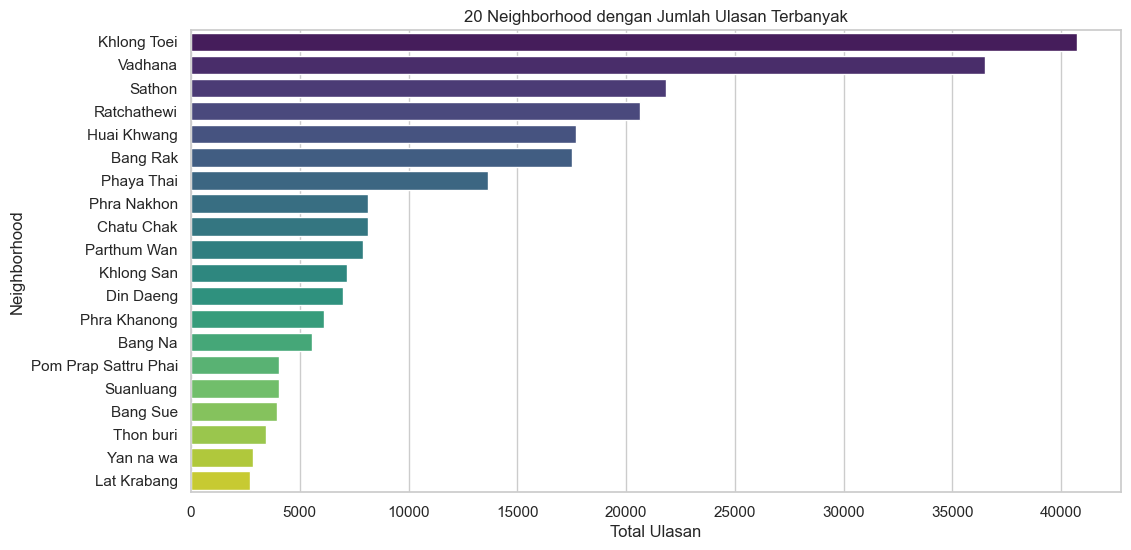

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung total ulasan per neighborhood
top_neighbourhoods = df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()

# Urutkan berdasarkan total ulasan dan ambil 20 teratas
top_neighbourhoods = top_neighbourhoods.sort_values(by='number_of_reviews', ascending=False).head(20)

# Tampilkan hasil
print("20 Neighborhood dengan Jumlah Ulasan Terbanyak:\n", top_neighbourhoods)

# Visualisasi dengan bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_reviews', y='neighbourhood', data=top_neighbourhoods, palette='viridis')
plt.title('20 Neighborhood dengan Jumlah Ulasan Terbanyak')
plt.xlabel('Total Ulasan')
plt.ylabel('Neighborhood')
plt.show()


Korelasi Spearman antara jumlah ulasan dan rata-rata harga: 0.07808298126559891, p-value: 0.5898943272580583


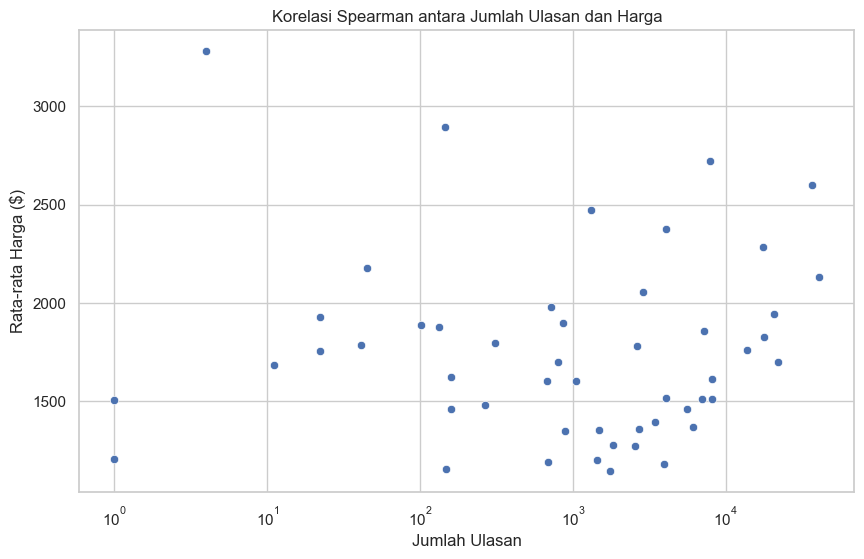

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Menghitung rata-rata harga per neighbourhood
average_price_per_neighbourhood = df.groupby('neighbourhood')['price'].mean().reset_index()

# Menghitung total ulasan per neighbourhood
total_reviews_per_neighbourhood = df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()

# Menggabungkan data rata-rata harga dan jumlah ulasan
combined_data = pd.merge(average_price_per_neighbourhood, total_reviews_per_neighbourhood, on='neighbourhood')

# Uji korelasi Spearman
spearman_corr, p_value = spearmanr(combined_data['price'], combined_data['number_of_reviews'])
print(f"Korelasi Spearman antara jumlah ulasan dan rata-rata harga: {spearman_corr}, p-value: {p_value}")

# Visualisasi dengan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=combined_data)
plt.title('Korelasi Spearman antara Jumlah Ulasan dan Harga')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Rata-rata Harga ($)')
plt.xscale('log')  # Skala logaritmik untuk jumlah ulasan jika diperlukan
plt.show()


Korelasi Spearman antara jumlah ulasan dan rata-rata harga:
Korelasi: 0.39999999999999997, p-value: 0.6


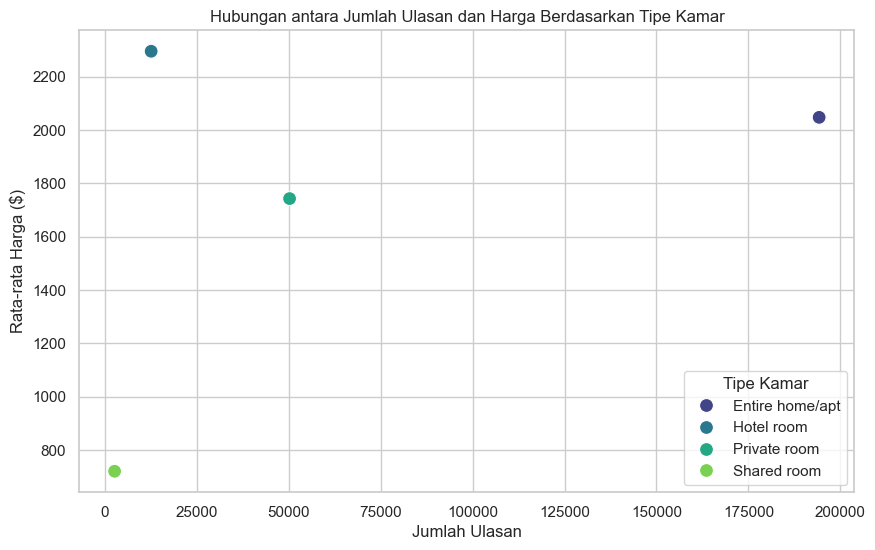

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Menghitung rata-rata harga dan jumlah ulasan per tipe kamar
avg_price_reviews = df.groupby('room_type').agg({
    'price': 'mean',
    'number_of_reviews': 'sum'
}).reset_index()

# Menghitung korelasi Spearman
correlation, p_value = spearmanr(avg_price_reviews['number_of_reviews'], avg_price_reviews['price'])

# Menampilkan hasil korelasi
print(f"Korelasi Spearman antara jumlah ulasan dan rata-rata harga:\nKorelasi: {correlation}, p-value: {p_value}")

# Visualisasi dengan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', hue='room_type', data=avg_price_reviews, palette='viridis', s=100)
plt.title('Hubungan antara Jumlah Ulasan dan Harga Berdasarkan Tipe Kamar')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Rata-rata Harga ($)')
plt.legend(title='Tipe Kamar')
plt.show()


Hasil analisis Korelasi Spearman antara jumlah ulasan dan rata-rata harga menunjukkan nilai korelasi sebesar 0.4, yang mengindikasikan adanya hubungan positif yang sedang antara kedua variabel. Artinya, semakin banyak ulasan yang diterima suatu listing, semakin tinggi rata-rata harga yang ditetapkan.

Namun, p-value sebesar 0.6 menunjukkan bahwa hubungan ini tidak signifikan secara statistik. Ini berarti kita tidak dapat menyimpulkan bahwa jumlah ulasan secara konsisten memengaruhi harga rata-rata akomodasi. Meskipun ada kecenderungan bahwa listing dengan lebih banyak ulasan memiliki harga yang lebih tinggi, hubungan ini bisa jadi dipengaruhi oleh faktor lain yang tidak diperhitungkan dalam analisis ini.

Secara keseluruhan, meskipun terdapat korelasi positif, tidak ada bukti yang kuat untuk mendukung hubungan signifikan antara jumlah ulasan dan harga. Ini menunjukkan perlunya analisis lebih lanjut untuk mengeksplorasi faktor-faktor lain yang mungkin berperan dalam penetapan harga akomodasi di Bangkok.

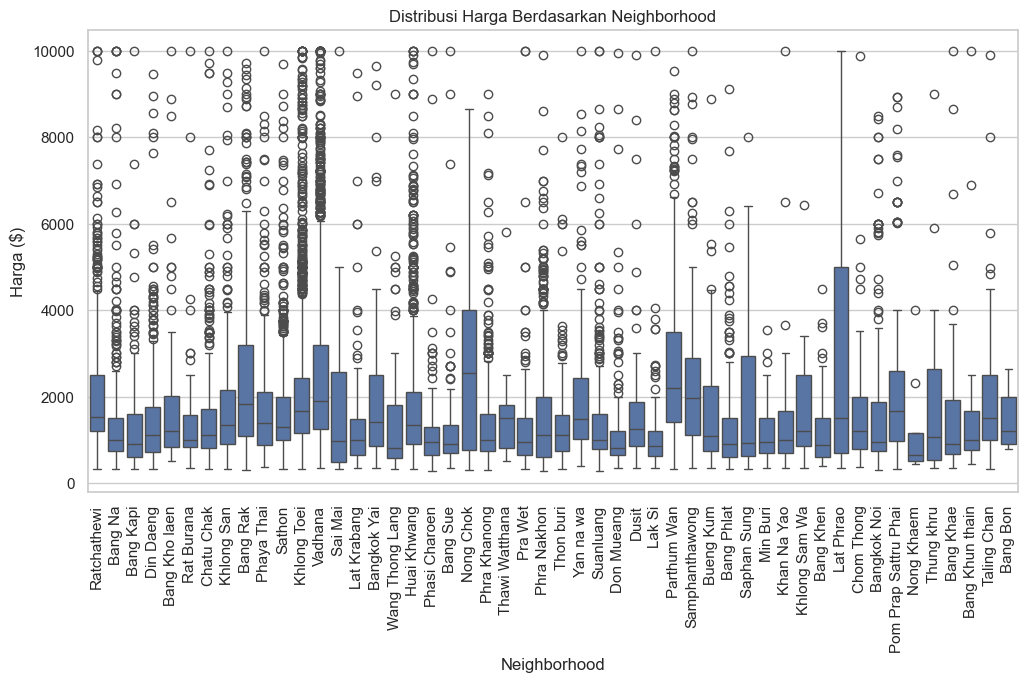

In [52]:
# Menghitung Statistik Deskriptif Harga Berdasarkan Neighborhood
price_by_neighborhood = df.groupby('neighbourhood')['price'].describe().reset_index()

# Tampilkan Statistik Deskriptif
#print(price_by_neighborhood)

# Visualisasi dengan Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood', y='price', data=df)
plt.title('Distribusi Harga Berdasarkan Neighborhood')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Harga ($)')
plt.show()



Kruskal-Wallis Test: Statistik = 2009.8345360493797, p-value = 0.0


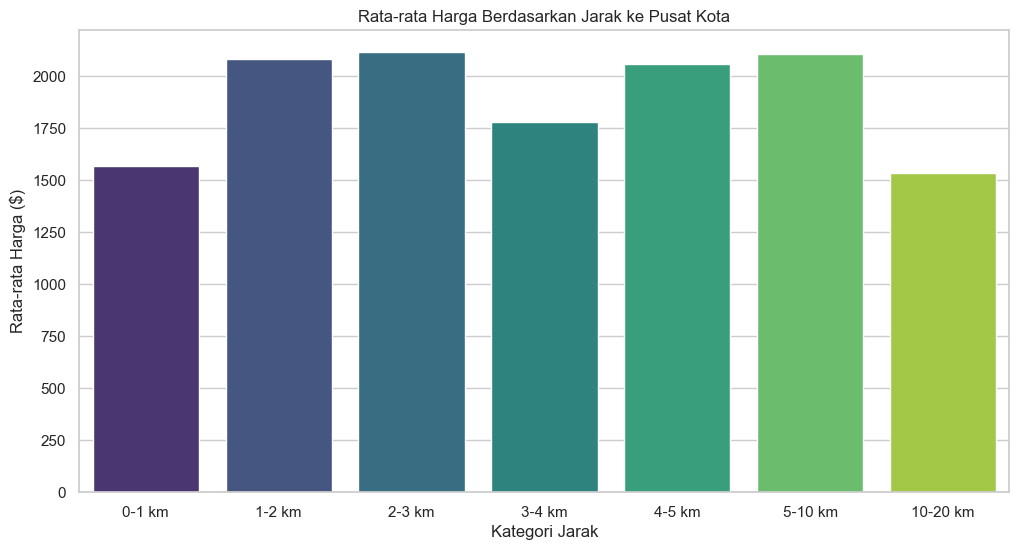

In [50]:

# Uji Kruskal-Wallis untuk Memeriksa Perbedaan Harga Berdasarkan Neighborhood
kruskal_test = stats.kruskal(*[group["price"].values for name, group in df.groupby("neighbourhood")])
print(f"Kruskal-Wallis Test: Statistik = {kruskal_test.statistic}, p-value = {kruskal_test.pvalue}")

# Jika menggunakan jarak ke pusat kota
# Menghitung Rata-rata Harga Berdasarkan Kategori Jarak
average_price_distance = df.groupby('distance_category')['price'].mean().reset_index()

# Visualisasi Bar Plot untuk Rata-rata Harga Berdasarkan Jarak ke Pusat Kota
plt.figure(figsize=(12, 6))
sns.barplot(x='distance_category', y='price', data=average_price_distance, palette='viridis')
plt.title('Rata-rata Harga Berdasarkan Jarak ke Pusat Kota')
plt.xlabel('Kategori Jarak')
plt.ylabel('Rata-rata Harga ($)')
plt.show()

Hasil dari uji Kruskal-Wallis menunjukkan statistik sebesar 2009.83 dan p-value sebesar 0.0, yang mengindikasikan adanya perbedaan signifikan dalam harga berdasarkan neighborhood (daerah). P-value yang sangat rendah (jauh di bawah 0.05) menyiratkan bahwa setidaknya ada satu pasangan grup neighborhood yang memiliki perbedaan harga yang signifikan.

Dengan kata lain, hasil ini menunjukkan bahwa harga akomodasi bervariasi secara signifikan di antara berbagai neighborhood di Bangkok. Ini bisa disebabkan oleh beberapa faktor, seperti lokasi, fasilitas, atau karakteristik unik dari masing-masing area.

Oleh karena itu, pemangku kepentingan, seperti pengelola properti atau investor, perlu memperhatikan perbedaan harga ini saat menentukan strategi penetapan harga dan pemilihan lokasi. Penelitian lebih lanjut dapat dilakukan untuk memahami faktor-faktor spesifik yang mempengaruhi perbedaan harga di masing-masing neighborhood.

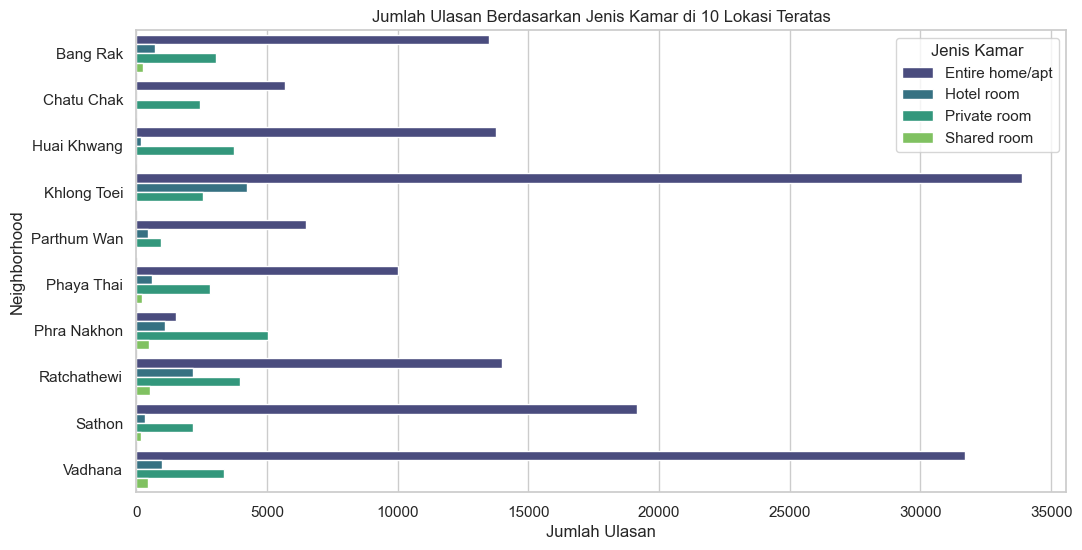

In [39]:
# Menghitung jumlah ulasan berdasarkan neighborhood dan room_type
reviews_by_neighborhood_and_type = df.groupby(['neighbourhood', 'room_type'])['number_of_reviews'].sum().reset_index()

# Mengurutkan berdasarkan jumlah ulasan untuk setiap neighborhood
top_neighborhoods_reviews = reviews_by_neighborhood_and_type.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
top_neighborhoods_reviews = top_neighborhoods_reviews.sort_values(by='number_of_reviews', ascending=False).head(10)

# Mengambil data untuk 10 neighborhood teratas
top_neighborhoods = top_neighborhoods_reviews['neighbourhood'].tolist()
top_reviews_data = reviews_by_neighborhood_and_type[reviews_by_neighborhood_and_type['neighbourhood'].isin(top_neighborhoods)]

# Visualisasi dengan bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_reviews_data, x='number_of_reviews', y='neighbourhood', hue='room_type', palette='viridis')
plt.title('Jumlah Ulasan Berdasarkan Jenis Kamar di 10 Lokasi Teratas')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Neighborhood')
plt.legend(title='Jenis Kamar')
plt.show()


Jumlah Ulasan Berdasarkan Jenis Kamar:
          room_type  number_of_reviews
0  Entire home/apt             194226
2     Private room              50251
1       Hotel room              12619
3      Shared room               2682


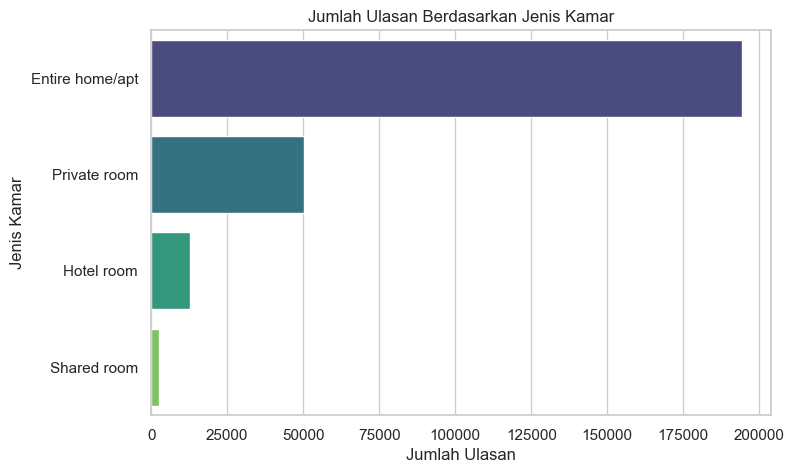

In [40]:
# Menghitung jumlah ulasan berdasarkan jenis kamar
reviews_by_room_type = df.groupby('room_type')['number_of_reviews'].sum().reset_index()

# Mengurutkan berdasarkan jumlah ulasan
reviews_by_room_type = reviews_by_room_type.sort_values(by='number_of_reviews', ascending=False)

# Menampilkan hasil
print("Jumlah Ulasan Berdasarkan Jenis Kamar:\n", reviews_by_room_type)

plt.figure(figsize=(8, 5))
sns.barplot(x='number_of_reviews', y='room_type', data=reviews_by_room_type, palette='viridis')
plt.title('Jumlah Ulasan Berdasarkan Jenis Kamar')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Jenis Kamar')
plt.show()

Berdasarkan data jumlah ulasan yang dikumpulkan berdasarkan jenis kamar, terlihat bahwa:

Entire home/apt (Seluruh rumah/ apartemen) memiliki jumlah ulasan tertinggi dengan 194,226 ulasan. Ini menunjukkan bahwa tipe akomodasi ini paling banyak digunakan dan menarik perhatian tamu, mungkin karena menawarkan privasi dan kenyamanan yang lebih dibandingkan jenis kamar lainnya.

Private room (Kamar pribadi) menyusul dengan 50,251 ulasan. Tipe ini juga cukup populer, memberikan pengalaman menginap yang lebih pribadi tetapi dengan biaya yang lebih rendah dibandingkan menyewa seluruh rumah.

Hotel room (Kamar hotel) memiliki 12,619 ulasan, yang menunjukkan minat yang lebih rendah dibandingkan dua jenis sebelumnya. Hal ini mungkin disebabkan oleh keberadaan opsi akomodasi alternatif yang lebih menarik seperti Airbnb.

Shared room (Kamar bersama) mencatat jumlah ulasan terendah dengan 2,682 ulasan. Ini mungkin mencerminkan preferensi yang lebih sedikit untuk tipe akomodasi ini, yang biasanya menawarkan pengalaman berbagi dan kurang privasi.

Secara keseluruhan, data ini menunjukkan bahwa tamu cenderung lebih memilih akomodasi yang menawarkan ruang pribadi dan kenyamanan, seperti Entire home/apt dan Private room, dibandingkan dengan opsi yang lebih terbatas seperti Shared room. Ini bisa menjadi pertimbangan penting bagi penyewa dalam menentukan jenis kamar yang akan ditawarkan.

## E. Pengaruh ketersediaan terhadap Harga

Statistik Availability:
 count    15467.000000
mean       243.965475
std        125.726859
min          0.000000
25%        137.000000
50%        308.000000
75%        360.000000
max        365.000000
Name: availability_365, dtype: float64

Statistik Harga:
 count    15467.000000
mean      1903.146829
std       1621.062856
min        278.000000
25%        900.000000
50%       1400.000000
75%       2275.500000
max      10000.000000
Name: price, dtype: float64


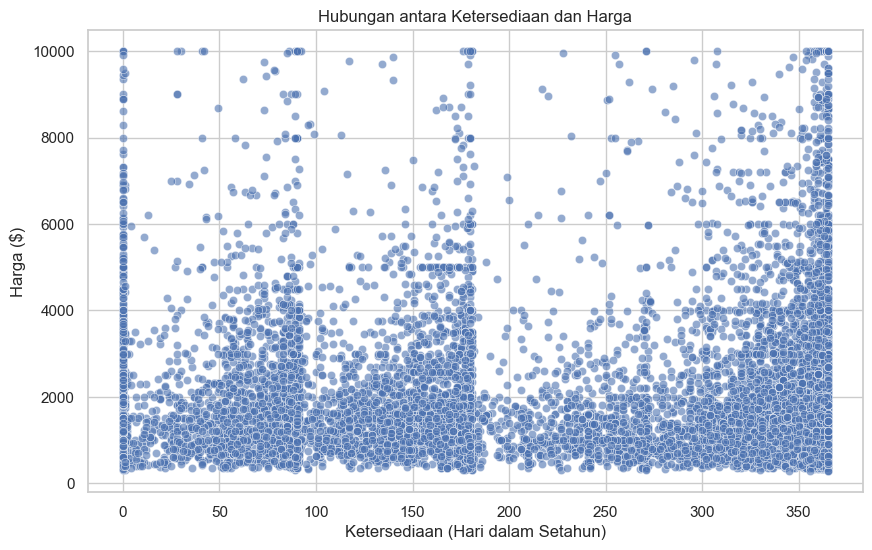

In [49]:
#Statistik Deskriptif untuk Ketersediaan dan Harga
availability_stats = df['availability_365'].describe()
price_stats = df['price'].describe()

print("Statistik Availability:\n", availability_stats)
print("\nStatistik Harga:\n", price_stats)

#Visualisasi Hubungan Menggunakan Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.6)
plt.title('Hubungan antara Ketersediaan dan Harga')
plt.xlabel('Ketersediaan (Hari dalam Setahun)')
plt.ylabel('Harga ($)')
plt.xscale('linear')  # Ubah ke 'log' jika perlu
plt.show()

# Boxplot untuk Ketersediaan Berdasarkan Kategori Harga
# Mengkategorikan availability
df['availability_category'] = pd.cut(df['availability_365'], bins=[0, 30, 180, 365],
                                      labels=['Rendah', 'Sedang', 'Tinggi'])



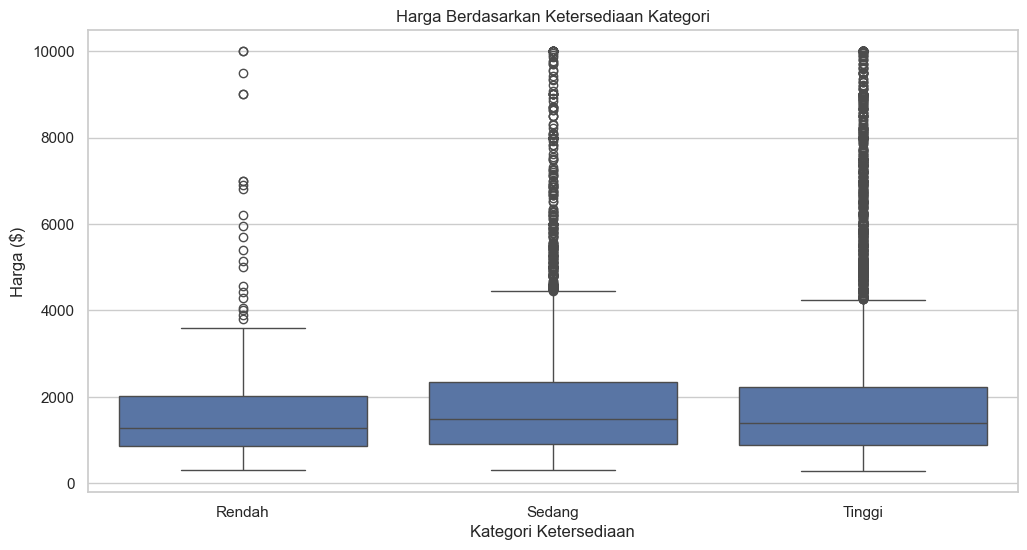

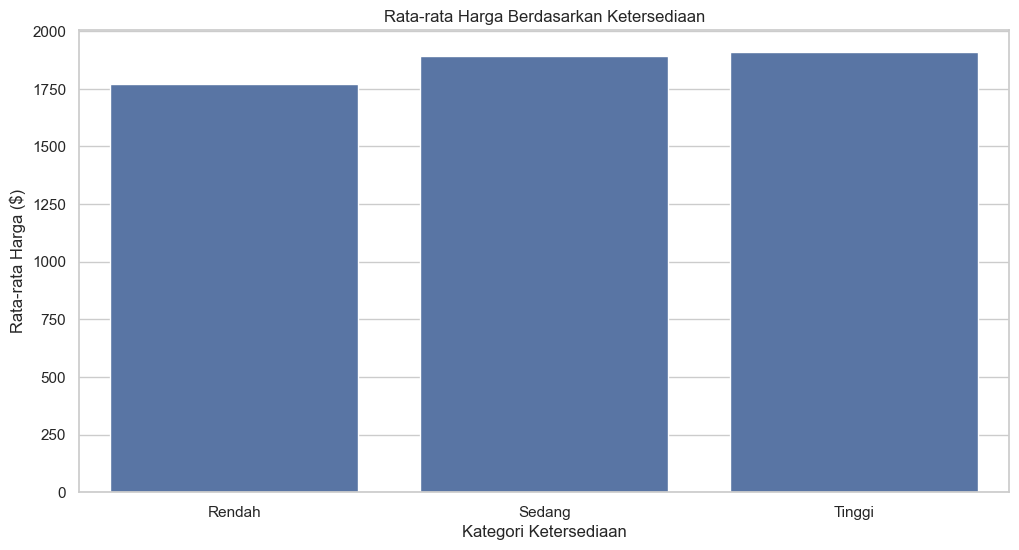

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='availability_category', y='price', data=df)
plt.title('Harga Berdasarkan Ketersediaan Kategori')
plt.xlabel('Kategori Ketersediaan')
plt.ylabel('Harga ($)')
plt.show()

# Analisis Rata-rata Harga Berdasarkan Ketersediaan
average_price_by_availability = df.groupby('availability_category')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='availability_category', y='price', data=average_price_by_availability)
plt.title('Rata-rata Harga Berdasarkan Ketersediaan')
plt.xlabel('Kategori Ketersediaan')
plt.ylabel('Rata-rata Harga ($)')
plt.show()

Dari analisis ini, tampak bahwa meskipun ada hubungan antara ketersediaan dan harga, tidak ada perbedaan harga yang sangat mencolok antara kategori ketersediaan tinggi dan rendah. Host yang menawarkan ketersediaan tinggi tidak selalu menetapkan harga yang lebih rendah, menunjukkan bahwa faktor lain—seperti lokasi, jenis kamar, dan fasilitas—juga berkontribusi pada penentuan harga. Ini mencerminkan dinamika pasar di mana permintaan, penawaran, dan preferensi tamu memainkan peran penting dalam harga akomodasi.

## F. Ketersediaan Listing di seluruh distrik Kota Bangkok

In [44]:

# Menampilkan semua nilai dalam kolom 'neighbourhood' beserta frekuensinya
district_counts = df['neighbourhood'].value_counts()

# Mendapatkan distrik yang ada di DataFrame
existing_districts = set(district_counts.index)

# Daftar semua distrik di Bangkok
all_districts = [
    "Bang Bon", "Bang Kapi", "Bang Khae", "Bang Khen", "Bang Kho Laem",
    "Bang Khun Thian", "Bang Na", "Bang Phlat", "Bang Rak", "Bang Sue",
    "Bangkok Noi", "Bangkok Yai", "Bueng Kum", "Chatuchak", "Chom Thong",
    "Din Daeng", "Don Mueang", "Dusit", "Huai Khwang", "Khan Na Yao",
    "Khlong Sam Wa", "Khlong San", "Khlong Toei", "Lak Si", "Lat Krabang",
    "Lat Phrao", "Min Buri", "Nong Chok", "Nong Khaem", "Pathum Wan",
    "Phasi Charoen", "Phaya Thai", "Phra Khanong", "Phra Nakhon",
    "Pom Prap Sattru Phai", "Prawet", "Rat Burana", "Ratchathewi",
    "Sai Mai", "Samphanthawong", "Saphan Sung", "Sathon", "Suan Luang",
    "Taling Chan", "Thawi Watthana", "Thon Buri", "Thung Khru",
    "Wang Thonglang", "Watthana", "Yan Nawa"
]

# Mengubah daftar menjadi set untuk perbandingan
all_districts_set = set(all_districts)

# Mencari distrik yang tidak ada di DataFrame
missing_districts = all_districts_set - existing_districts

# Menampilkan hasil
print("Distrik yang tidak memiliki listing di Airbnb:")
print(missing_districts)

# Menampilkan distrik yang ada di DataFrame
print("\nDistrik yang memiliki listing di Airbnb:")
print(existing_districts)

Distrik yang tidak memiliki listing di Airbnb:
{'Prawet', 'Chatuchak', 'Suan Luang', 'Bang Kho Laem', 'Wang Thonglang', 'Thung Khru', 'Pathum Wan', 'Bang Khun Thian', 'Thon Buri', 'Watthana', 'Yan Nawa'}

Distrik yang memiliki listing di Airbnb:
{'Wang Thong Lang', 'Huai Khwang', 'Bang Khae', 'Bangkok Yai', 'Sai Mai', 'Min Buri', 'Thung khru', 'Nong Khaem', 'Don Mueang', 'Pom Prap Sattru Phai', 'Bueng Kum', 'Khlong San', 'Bang Kho laen', 'Pra Wet', 'Din Daeng', 'Chom Thong', 'Khlong Toei', 'Phasi Charoen', 'Phra Khanong', 'Parthum Wan', 'Lak Si', 'Samphanthawong', 'Saphan Sung', 'Bang Rak', 'Phra Nakhon', 'Phaya Thai', 'Khan Na Yao', 'Bangkok Noi', 'Thawi Watthana', 'Lat Phrao', 'Khlong Sam Wa', 'Chatu Chak', 'Bang Na', 'Bang Kapi', 'Lat Krabang', 'Ratchathewi', 'Bang Khen', 'Taling Chan', 'Rat Burana', 'Thon buri', 'Bang Bon', 'Yan na wa', 'Sathon', 'Nong Chok', 'Bang Khun thain', 'Vadhana', 'Bang Phlat', 'Bang Sue', 'Suanluang', 'Dusit'}


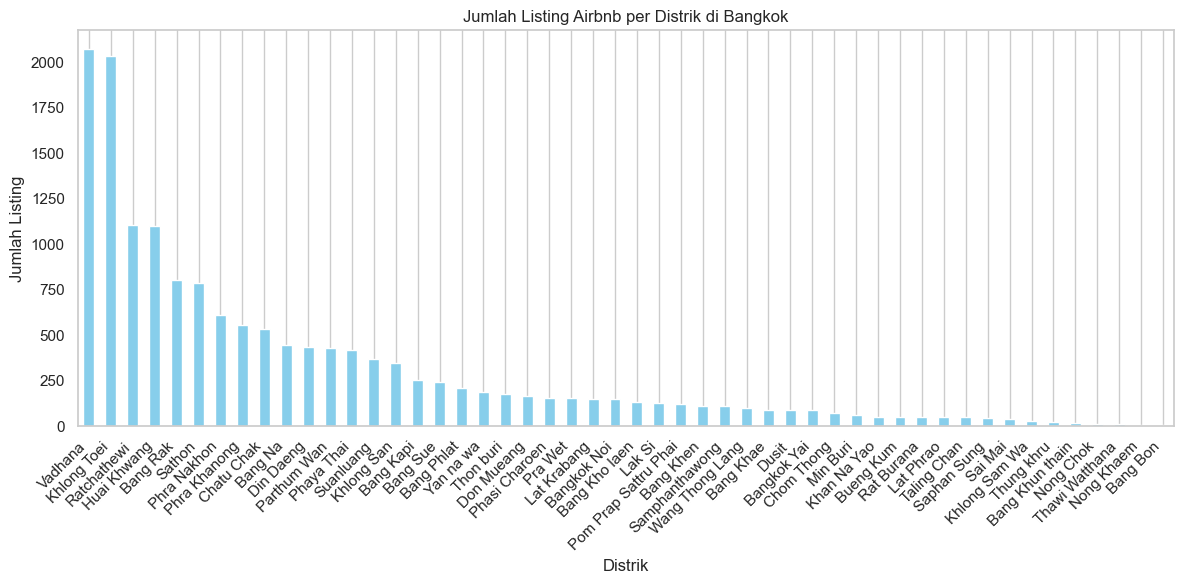

In [45]:
# Menampilkan semua nilai dalam kolom 'neighbourhood' beserta frekuensinya
district_counts = df['neighbourhood'].value_counts()

# Plot histogram
plt.figure(figsize=(12, 6))
district_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Listing Airbnb per Distrik di Bangkok')
plt.xlabel('Distrik')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Tampilkan plot
plt.tight_layout()
plt.show()

Dari data ini, terlihat bahwa ada beberapa distrik di Bangkok yang tidak terdaftar dalam platform Airbnb, yang mungkin menunjukkan kurangnya minat dari host atau masalah lain terkait dengan peraturan atau daya tarik wisata. Sementara itu, distrik yang memiliki listing menunjukkan variasi dalam penyediaan akomodasi, mencerminkan pilihan yang lebih luas bagi para tamu yang mencari tempat menginap di Bangkok. Ini juga dapat menjadi indikasi dari popularitas atau aksesibilitas distrik tersebut dalam hal pariwisata dan kegiatan.

# C. Kesimpulan Akhir

Analisis Data Airbnb Bangkok
1. Pendahuluan
Analisis ini berfokus pada data Airbnb di Bangkok untuk memberikan wawasan mengenai harga, lokasi, jenis kamar, ulasan, dan performa host. Dengan memahami faktor-faktor ini, stakeholder dapat membuat keputusan yang lebih baik dalam strategi pemasaran dan pengelolaan listing.

2. Deskripsi Data
Dataset yang digunakan mencakup berbagai kolom penting, antara lain:

- price: Harga per malam untuk setiap listing.
- room_type: Jenis kamar yang ditawarkan (misalnya, "Entire home/apt", "Private room").
- neighbourhood: Lokasi listing di Bangkok.
- number_of_reviews: Jumlah ulasan yang diterima.
- availability: Ketersediaan listing untuk disewa.

3. Metodologi Analisis
Analisis ini mencakup beberapa uji statistik untuk menggali hubungan antara variabel-variabel di atas:

- Statistik Deskriptif: Untuk melihat rata-rata, median, dan penyebaran harga berdasarkan jenis kamar dan lokasi.
- Kruskal-Wallis Test: Untuk menguji perbedaan harga antar jenis kamar dan lokasi, yang menghasilkan statistik dan p-value untuk mengevaluasi signifikansi.
- Korelasi Spearman: Untuk menganalisis hubungan antara jumlah ulasan dan harga, serta kategori lokasi dengan harga.

4. Temuan Utama
- Harga:

Harga rata-rata bervariasi berdasarkan jenis kamar. Kamar "Entire home/apt" memiliki harga rata-rata tertinggi.
Statistik Deskriptif menunjukkan perbedaan yang signifikan dalam harga berdasarkan kategori jarak ke pusat kota.
- Lokasi:

Listing yang lebih dekat ke pusat kota cenderung memiliki harga yang lebih tinggi.
Kruskal-Wallis Test menunjukkan perbedaan signifikan dalam harga berdasarkan lokasi, dengan p-value yang sangat kecil (0.0).

- Jenis Kamar:

"Entire home/apt" dan "Private room" adalah jenis kamar yang paling banyak diulas. Visualisasi jumlah ulasan menunjukkan preferensi pelanggan terhadap jenis kamar ini.
- Ulasan:

Ada hubungan positif antara jumlah ulasan dan harga, tetapi tidak signifikan di beberapa kategori. Popularitas lokasi berhubungan dengan harga yang lebih tinggi.
- Performa Host:

Host dengan banyak listing dan ulasan biasanya menawarkan harga yang lebih kompetitif. Rata-rata harga yang diperoleh oleh host bervariasi, menunjukkan adanya potensi untuk meningkatkan pendapatan. Lebih banyak host yang berada di bawah rata-rata juga menunjukkan adanya ruang untuk pengembangan.

5. Kesimpulan
Berdasarkan analisis, beberapa kesimpulan dapat diambil:

- Penginapan Airbnb tersebar hampir di seluruh distrik Bangkok, dengan lokasi yang memainkan peranan penting dalam popularitas listing.
- Host yang memiliki banyak listing tidak selalu menjamin banyak ulasan, tetapi memiliki pengaruh terhadap reputasi.
- Jenis Kamar berkontribusi signifikan terhadap daya tarik listing, dengan "Entire home/apt" menjadi yang paling diminati.
- Harga memiliki korelasi rendah dengan popularitas secara keseluruhan, tetapi tetap menjadi faktor penting dalam preferensi tamu.
- Ketersediaan jenis kamar menunjukkan pengaruh negatif terhadap popularitas, namun tidak signifikan.

6. Rekomendasi untuk Stakeholder
- Strategi Pemasaran: Fokuskan promosi pada jenis kamar yang populer, penentuan lokasi dekat dengan pusat kota ternyata tidak terlalu berpengaruh selama jenis kamar diminati.
- Peningkatan Kualitas: Investasi dalam peningkatan fasilitas dan layanan pada jenis kamar yang banyak diminati dapat meningkatkan kepuasan pelanggan. Stakeholder juga dapat menambahkan airbnb listings di distrik yang belum teresedia
- Pengelolaan Host: Berikan pelatihan kepada host untuk meningkatkan jumlah ulasan dan kualitas listing mereka, yang berpotensi meningkatkan harga dan reputasi.
- Program Promosi: Tawarkan program promosi untuk listing dengan harga terjangkau dan waktu sewa minimum yang fleksibel, agar menarik lebih banyak tamu.
- Analisis Tren: Terus lakukan analisis untuk memahami perubahan dalam preferensi pelanggan dan mengadaptasi strategi sesuai kebutuhan pasar.

Dengan langkah-langkah ini, diharapkan stakeholder dapat memanfaatkan data untuk meningkatkan performa dan daya tarik listing Airbnb di Bangkok.